**DeapSECURE module 4: Deap Learning**

# Session 3: Model Tuning

Welcome to the DeapSECURE online training program!
This is a Jupyter notebook for the hands-on learning activities of the
["Deep Learning" (DL) module](https://deapsecure.gitlab.io/deapsecure-lesson04-nn/),
Episode 5: ["Tuning Neural Network Models for Better Accuracy"](https://deapsecure.gitlab.io/deapsecure-lesson04-nn/25-model-tuning/index.html).
Please visit the [DeapSECURE](https://deapsecure.gitlab.io/) website to learn more about our training program.

## Overview

In this session, we will use this notebook to **tune** neural network models to improve the accuracy of the classification task on the Sherlock's "Applications" dataset.
We will be using the same dataset, which contains 18 applications, introduced in the previous notebook (`NN-session-2.ipynb`).

> **Your challenge** in this notebook is to train more neural network models using the "18-apps" dataset to improve the classification accuracy of the model. Can we reach 99%? How about 99.9%? Or 99.99%?

> **DISCUSSION**: In cybersecurity, why do we care about 99.99% or even 99.999% accuracy?
> Think, for example, the case of spam detection.
> What will happen if we falsely mark many legitimate emails as spam?
> Or let many spam mails enter into your inbox?

**QUICK LINKS**
* [Setup](#sec-setup)
* [Loading Sherlock Applications Data](#sec-load_data)
* [Neural Network Models](#sec-NN)
* [Model Tuning Methods](#sec-Model_Tuning_Methods)

  - Varying the number of neurons 

<a id="sec-setup"></a>
## 1. Setup Instructions

If you are opening this notebook from the Wahab OnDemand interface, you're all set.

If you see this notebook elsewhere, and want to perform the exercises on Wahab cluster, please follow the steps outlined in our setup procedure.

1. Make sure you have activated your HPC service.
2. Point your web browser to https://ondemand.wahab.hpc.odu.edu/ and sign in with your MIDAS ID and password.
3. Create a new Jupyter session using Python suite called `tensorflow 2.6 + pytorch 1.10 CPU`, then create a new "Python3" notebook. (See <a href="https://wiki.hpc.odu.edu/en/ood-jupyter" target="_blank">ODU HPC wiki</a> for more detailed help.)
4. Get the necessary files using commands below within Jupyter:

       mkdir -p ~/CItraining/module-nn
       cp -pr /shared/DeapSECURE/module-nn/. ~/CItraining/module-nn
       cd ~/CItraining/module-nn

The file name of this notebook is `NN-session-3.ipynb`.

### 1.1 Reminder

* Throughout this notebook, `#TODO` is used as a placeholder where you need to fill in with something appropriate. 

* To run a code in a cell, press `Shift+Enter`.

* <a href="https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf" target="_blank">Pandas cheatsheet</a>

* <a href="https://deapsecure.gitlab.io/deapsecure-lesson02-bd/10-pandas-intro/index.html#summary-of-indexing-syntax" target="_blank">Summary table of the commonly used indexing syntax</a> from our own lesson.

* <a href="https://keras.io/api/" target="_blank">Keras API document</a>

We recommend you open these on separate tabs or print them;
they are handy help for writing your own codes.

### 1.2 Loading Python Libraries

Next step, we need to import the required libraries into this Jupyter Notebook:
`pandas`, `numpy`,`matplotlib.pyplot`,`sklearn` and `tensorflow`.

In [1]:
#RUNIT

# Run to load environment modules on HPC
#module("load", "DeapSECURE")

\#RUNIT
Few additional modules need to be loaded to access the GPU via CUDA and TensorFlow library.
Keras is now part of TensorFlow:

In [2]:
#RUNIT

#module("load", "cuda")
#module("load", "py-tensorflow")
#module("list")

\#RUNIT
Now we can import all the required modules into Python:

In [3]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# CUSTOMIZATIONS (optional)
np.set_printoptions(linewidth=1000)

%matplotlib inline

In [4]:
# tools for machine learning:
import sklearn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# for evaluating model performance
from sklearn.metrics import accuracy_score, confusion_matrix

# classic machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
/opt/conda/lib/python3.7/site-packages/sklearn/_distributor_init.py:25: FutureWarning: 
USE_DAAL4PY_SKLEARN variable is deprecated for Intel(R) Extension for Scikit-learn
and will be delete in the 2022.1 release.
Please, use new construction of global patching:
python sklearnex.glob patch_sklearn
Read more: https://intel.github.io/scikit-learn-intelex/global_patching.html
  FutureWarning)


In [5]:
# tools for deep learning:
import tensorflow as tf
import tensorflow.keras as keras

# Import key Keras objects
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [6]:
#RUNIT
# For developers only:
import tensorflow.keras.models as _keras_models
import tensorflow.keras.layers as _keras_layers

In [7]:
#RUNIT
#dir(_keras_layers)

<a id="sec-load_data"></a>
## 2. Loading Sherlock Applications Data

The data preparation steps below are 100% identical to those steps in the previous notebook; we simply repeat them here to prepare the data for training neural network models.
Simply run these steps and move on to the next section.

In [8]:
df = pd.read_csv("sherlock/sherlock_18apps.csv", index_col=0)

## Summarize the dataset
print("* shape:", df.shape)
print()
print("* info::\n")
df.info()
print()
print("* describe::\n")
print(df.describe().T)
print()

* shape: (273129, 19)

* info::

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273129 entries, 0 to 999994
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ApplicationName    273129 non-null  object 
 1   CPU_USAGE          273077 non-null  float64
 2   UidRxBytes         273129 non-null  int64  
 3   UidRxPackets       273129 non-null  int64  
 4   UidTxBytes         273129 non-null  int64  
 5   UidTxPackets       273129 non-null  int64  
 6   cutime             273077 non-null  float64
 7   guest_time         273077 non-null  float64
 8   importance         273129 non-null  int64  
 9   lru                273129 non-null  int64  
 10  num_threads        273077 non-null  float64
 11  otherPrivateDirty  273129 non-null  int64  
 12  priority           273077 non-null  float64
 13  rss                273077 non-null  float64
 14  state              273077 non-null  object 
 15  stime             

In [9]:
#RUNIT
df.head(10)

ApplicationName  CPU_USAGE  UidRxBytes  UidRxPackets  UidTxBytes  \
0              Gmail       0.13           0             0           0   
6           Hangouts       1.65           0             0           0   
11         Messenger       0.21           0             0           0   
18          Geo News       0.03           0             0           0   
19          Facebook       0.20           0             0           0   
28        Google App       0.51         266             3         208   
29          Calendar       0.03           0             0           0   
32            Photos       0.02           0             0           0   
35  ES File Explorer       0.08           0             0           0   
39        Google App       0.00           0             0           0   

    UidTxPackets  cutime  guest_time  importance  lru  num_threads  \
0              0     0.0         0.0         400   15         32.0   
6              0     0.0         0.0         400   15         17.0   
11             0     0.0         0.0         300    0         72.0   
18             0     0.0         0.0         300    0         14.0   
19             0     0.0         0.0         300    0         77.0   
28             4     0.0         0.0         300    0         94.0   
29             0     0.0         0.0         400   15         25.0   
32             0     0.0         0.0         300    0         11.0   
35             0     0.0         0.0         400   13         20.0   
39             0     0.0         0.0         200    0         10.0   

    otherPrivateDirty  priority      rss state  stime   utime         vsize  \
0                8300      20.0  10957.0     S  180.0   311.0  2.064265e+09   
6               27284      20.0  20043.0     S   67.0   210.0  2.047980e+09   
11              11324      20.0  13891.0     S  395.0   542.0  2.106794e+09   
18                860      20.0   5694.0     S   43.0    39.0  1.893417e+09   
19               5776      20.0   8511.0     S  401.0   464.0  2.204619e+09   
28              25912      20.0  17688.0     S  992.0  1760.0  2.273260e+09   
29               5304      20.0   7944.0     S   24.0    39.0  1.929048e+09   
32                 88      20.0   3959.0     S   16.0    54.0  1.923707e+09   
35               3284      20.0   6674.0     S  121.0   168.0  1.960612e+09   
39                556      20.0   2961.0     S  153.0    65.0  1.920733e+09   

    cminflt  
0       NaN  
6       NaN  
11      NaN  
18      NaN  
19      NaN  
28      NaN  
29      NaN  
32      NaN  
35      NaN  
39      NaN

In [10]:
#RUNIT
df.tail(10)

ApplicationName  CPU_USAGE  UidRxBytes  UidRxPackets  UidTxBytes  \
999961        Facebook       0.13           0             0           0   
999962          Chrome       0.04           0             0           0   
999972            Maps       0.12           0             0           0   
999976           Gmail       0.31           0             0           0   
999977        Facebook       0.20           0             0           0   
999984           Skype       1.79           0             0           0   
999985        Hangouts       2.00           0             0           0   
999989        Facebook       0.19           0             0           0   
999991       Messenger       0.09           0             0           0   
999994        Geo News       0.02           0             0           0   

        UidTxPackets  cutime  guest_time  importance  lru  num_threads  \
999961             0     0.0         0.0         300    0         11.0   
999962             0     0.0         0.0         400   15         10.0   
999972             0     0.0         0.0         400   15         25.0   
999976             0     0.0         0.0         400   11         30.0   
999977             0     0.0         0.0         400   15         10.0   
999984             0     0.0         0.0         400   15         31.0   
999985             0     0.0         0.0         400    9         48.0   
999989             0     0.0         0.0         300    0        134.0   
999991             0     0.0         0.0         300    0         81.0   
999994             0     0.0         0.0         300    0         23.0   

        otherPrivateDirty  priority      rss state   stime   utime  \
999961               1444      20.0   4543.0     S    21.0    23.0   
999962                196      20.0   3702.0     S     9.0     4.0   
999972                340      20.0   4128.0     S    55.0   106.0   
999976               8964      20.0  11606.0     S   157.0   257.0   
999977                396      20.0   4961.0     S    13.0    24.0   
999984              12596      20.0  18691.0     S    78.0    84.0   
999985              12760      20.0   7572.0     S  1090.0  2827.0   
999989              66296      20.0  28900.0     S  4038.0  4529.0   
999991               6556      20.0   9671.0     S  2293.0  1867.0   
999994                756      20.0   3661.0     S   512.0   413.0   

               vsize  cminflt  
999961  2.100892e+09      NaN  
999962  1.897894e+09      NaN  
999972  1.994244e+09      NaN  
999976  2.032255e+09      NaN  
999977  2.095329e+09      NaN  
999984  1.999364e+09      NaN  
999985  2.154717e+09      NaN  
999989  2.372964e+09      NaN  
999991  2.127880e+09      NaN  
999994  1.907130e+09      NaN

In [11]:
"""Perform cleaning of a Sherlock 19F17C dataset.
All the obviously bad and missing data are removed.
"""
# Missing data or bad data
del_features_bad = [
    'cminflt', # all-missing feature
    'guest_time', # all-flat feature
]
df2 = df.drop(del_features_bad, axis=1)

print("Cleaning:")
print("- dropped %d columns: %s" % (len(del_features_bad), del_features_bad))

Cleaning:
- dropped 2 columns: ['cminflt', 'guest_time']


In [12]:
print("- remaining missing data (per feature):")

isna_counts = df2.isna().sum()
print(isna_counts[isna_counts > 0])
print("- dropping the rest of missing data")

df2.dropna(inplace=True)

print("- remaining shape: %s" % (df2.shape,))

- remaining missing data (per feature):
CPU_USAGE      52
cutime         52
num_threads    52
priority       52
rss            52
state          52
stime          52
utime          52
vsize          52
dtype: int64
- dropping the rest of missing data
- remaining shape: (273077, 17)


In [13]:
"""Separate labels from the features"""
print("Step: Separating the labels (ApplicationName) from the features.")
labels = df2['ApplicationName']
df_features = df2.drop('ApplicationName', axis=1)

Step: Separating the labels (ApplicationName) from the features.


In [14]:
"""Perform one-hot encoding for **all** categorical features."""
print("Step: Converting all non-numerical features to one-hot encoding.")
# This will be explained later
df_features = pd.get_dummies(df_features)

Step: Converting all non-numerical features to one-hot encoding.


In [15]:
"""(optional) Inspect the most current dataframe contents:""";
#df_features.head()

In [16]:
#RUNIT
df_features.head()

CPU_USAGE  UidRxBytes  UidRxPackets  UidTxBytes  UidTxPackets  cutime  \
0        0.13           0             0           0             0     0.0   
6        1.65           0             0           0             0     0.0   
11       0.21           0             0           0             0     0.0   
18       0.03           0             0           0             0     0.0   
19       0.20           0             0           0             0     0.0   

    importance  lru  num_threads  otherPrivateDirty  priority      rss  stime  \
0          400   15         32.0               8300      20.0  10957.0  180.0   
6          400   15         17.0              27284      20.0  20043.0   67.0   
11         300    0         72.0              11324      20.0  13891.0  395.0   
18         300    0         14.0                860      20.0   5694.0   43.0   
19         300    0         77.0               5776      20.0   8511.0  401.0   

    utime         vsize  state_D  state_R  state_S  state_Z  
0   311.0  2.064265e+09        0        0        1        0  
6   210.0  2.047980e+09        0        0        1        0  
11  542.0  2.106794e+09        0        0        1        0  
18   39.0  1.893417e+09        0        0        1        0  
19  464.0  2.204619e+09        0        0        1        0

In [17]:
#RUNIT
df_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273077 entries, 0 to 999994
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CPU_USAGE          273077 non-null  float64
 1   UidRxBytes         273077 non-null  int64  
 2   UidRxPackets       273077 non-null  int64  
 3   UidTxBytes         273077 non-null  int64  
 4   UidTxPackets       273077 non-null  int64  
 5   cutime             273077 non-null  float64
 6   importance         273077 non-null  int64  
 7   lru                273077 non-null  int64  
 8   num_threads        273077 non-null  float64
 9   otherPrivateDirty  273077 non-null  int64  
 10  priority           273077 non-null  float64
 11  rss                273077 non-null  float64
 12  stime              273077 non-null  float64
 13  utime              273077 non-null  float64
 14  vsize              273077 non-null  float64
 15  state_D            273077 non-null  uint8  
 16  st

In [18]:
"""Step: Feature scaling using StandardScaler."""
print("Step: Feature scaling with StandardScaler")

df = df_features
df_features_unscaled = df
scaler = preprocessing.StandardScaler()
scaler.fit(df)

# Recast the features still in a dataframe form
df_features = pd.DataFrame(scaler.transform(df),
                             columns=df.columns,
                             index=df.index)
print("After scaling:")
print(df_features.head(10))
print()

Step: Feature scaling with StandardScaler
After scaling:
    CPU_USAGE  UidRxBytes  UidRxPackets  UidTxBytes  UidTxPackets    cutime  \
0   -0.165792   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
6    0.308049   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
11  -0.140853   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
18  -0.196966   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
19  -0.143970   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
28  -0.047332   -0.003421      0.092426   -0.001260      0.149189 -0.185461   
29  -0.196966   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
32  -0.200083   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
35  -0.181379   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   
39  -0.206318   -0.010623     -0.015068   -0.008245     -0.016022 -0.185461   

    importance       lru  num_threads  otherPrivateDirty  priority       

In [19]:
"""Step: Perform train-test split on the master dataset.
This should be the last step before constructing & training the model.
"""
test_size = 0.2
random_state = 34

print("Step: Train-test split  test_size=%s  random_state=%s" \
      % (test_size, random_state))

train_features, test_features, train_labels, test_labels = \
                        train_test_split(df_features, labels,
                        test_size=test_size, random_state=random_state)

print("- training dataset: %d records" % (len(train_features),))
print("- testing dataset:  %d records" % (len(test_features),))
sys.stdout.flush()

print("Now the feature matrix is ready for machine learning!")

Step: Train-test split  test_size=0.2  random_state=34
- training dataset: 218461 records
- testing dataset:  54616 records
Now the feature matrix is ready for machine learning!


In [20]:
#RUNIT
train_features.head(10)

0         1         2         3         4         5         6   \
247478 -0.047332 -0.010623 -0.015068 -0.008245 -0.016022 -0.185461  0.967513   
93929   0.423392 -0.010623 -0.015068 -0.008245 -0.016022 -0.185461  0.967513   
22687  -0.178262 -0.010623 -0.015068 -0.008245 -0.016022 -0.185461  0.967513   
202083  0.139711 -0.010623 -0.015068 -0.008245 -0.016022 -0.185461 -2.406593   
229988 -0.206318 -0.010623 -0.015068 -0.008245 -0.016022 -0.185461 -1.281891   
25794  -0.206318 -0.010623 -0.015068 -0.008245 -0.016022 -0.185461 -1.281891   
132046  0.174002 -0.010623 -0.015068 -0.008245 -0.016022 -0.185461 -0.157189   
188393  2.574380 -0.010623 -0.015068 -0.008245 -0.016022 -0.185461 -2.406593   
88     -0.143970 -0.010623 -0.015068 -0.008245 -0.016022 -0.185461 -0.157189   
130796  0.130359 -0.010623 -0.015068 -0.008245 -0.016022  2.076362  0.967513   

              7         8         9         10        11        12        13  \
247478  1.621094 -0.644221 -0.378258  0.212762  0.561760 -0.368098 -0.449649   
93929   0.833346  1.145219  1.020384  0.212762  1.804086  0.088968  0.475591   
22687   1.621094 -0.383261 -0.307211  0.212762 -0.357238 -0.358570 -0.430870   
202083 -0.742150  1.965379  5.176248  0.212762  0.549822  0.226844  0.217193   
229988 -0.742150 -1.091581 -0.572651  0.212762 -1.063381 -0.375104 -0.468803   
25794  -0.742150 -1.091581 -0.590018  0.212762 -1.170213 -0.341196 -0.458099   
132046 -0.742150 -0.681501 -0.373916  0.212762  0.337979 -0.353806 -0.356317   
188393 -0.742150  2.039939  5.175656  0.212762  4.902618  0.123717  0.164799   
88     -0.742150  1.406179 -0.313329  0.212762 -0.005582 -0.273939 -0.384110   
130796  1.621094  0.958819 -0.092688  0.212762  1.374937 -0.375104 -0.451715   

              14        15        16        17       18  
247478 -0.512512 -0.020436 -0.060473  0.064346 -0.00789  
93929   1.829797 -0.020436 -0.060473  0.064346 -0.00789  
22687  -0.144340 -0.020436 -0.060473  0.064346 -0.00789  
202083  1.886490 -0.020436 -0.060473  0.064346 -0.00789  
229988 -1.098289 -0.020436 -0.060473  0.064346 -0.00789  
25794  -1.089401 -0.020436 -0.060473  0.064346 -0.00789  
132046 -0.828157 -0.020436 -0.060473  0.064346 -0.00789  
188393  1.673953 -0.020436 -0.060473  0.064346 -0.00789  
88      1.316752 -0.020436 -0.060473  0.064346 -0.00789  
130796  0.209563 -0.020436 -0.060473  0.064346 -0.00789

In [21]:
# RUNIT
# Both df and df2 work for the devel version, only df2 for learners version
# Leaving the scripts as is and using df2 should be fine
app_counts = df2.groupby('ApplicationName')['CPU_USAGE'].count()
print(app_counts)
print("Num of applications:",len(app_counts))

ApplicationName
Calendar             8986
Chrome              28045
ES File Explorer    16660
Facebook            20103
Geo News            19991
Gmail               16414
Google App          60001
Hangouts             7601
Maps                 5157
Messages             2507
Messenger           19989
Moovit               8365
Moriarty             3616
Photos              17380
Skype                4876
Waze                 8228
WhatsApp            19985
YouTube              5173
Name: CPU_USAGE, dtype: int64
Num of applications: 18


One-hot encoding for labels:

In [22]:
train_L_onehot = pd.get_dummies(train_labels)
test_L_onehot = pd.get_dummies(test_labels)

In [23]:
#RUNIT
train_L_onehot.head()

Calendar  Chrome  ES File Explorer  Facebook  Geo News  Gmail  \
908302         0       0                 0         0         0      0   
379044         0       0                 0         0         0      1   
95218          0       0                 0         0         0      1   
774096         0       0                 0         0         0      0   
855463         0       0                 0         0         0      0   

        Google App  Hangouts  Maps  Messages  Messenger  Moovit  Moriarty  \
908302           0         0     1         0          0       0         0   
379044           0         0     0         0          0       0         0   
95218            0         0     0         0          0       0         0   
774096           0         0     0         0          0       0         0   
855463           1         0     0         0          0       0         0   

        Photos  Skype  Waze  WhatsApp  YouTube  
908302       0      0     0         0        0  
379044       0      0     0         0        0  
95218        0      0     0         0        0  
774096       0      0     0         0        1  
855463       0      0     0         0        0

<a id="sec-NN"></a>
## 3. Neural Network Model with One Hidden Layer -- the Baseline

Let us now start by building a simple neural network model with just one hidden layer.
This will serve as a *baseline*, which we will attempt to improve through the tuning process below.

### 3.1 The Baseline Model

The baseline neural network model has one hidden layer with `18` hidden neurons and a learning rate of `0.0003`. It is trained with a batch size of 32.

In [24]:
def NN_Model_1H(hidden_neurons, learning_rate):
    """Definition of deep learning model with one dense hidden layer"""
    model = Sequential([
        # More hidden layers can be added here
        Dense(hidden_neurons, activation='relu', input_shape=(19,),
              kernel_initializer='random_normal'), # Hidden Layer
        Dense(18, activation='softmax',
              kernel_initializer='random_normal')  # Output Layer
    ])
    adam_opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=adam_opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

**QUESTION**: Why do we use the model with one hidden layer as a baseline, and not the model with no hidden layer?

\#RUNIT

**Answer**: The one hidden layer model will be used since the zero hidden layer model has no hidden neurons by definition (which is an important hyperparameter).
Therefore the usefulness of a model with no hidden layer will be limited in the tuning process.

Let us train this model with an initial *learning rate* of 0.0003.

In [25]:
#RUNIT
# Reproducibility hacks!

np.random.seed(38477518)
tf.random.set_seed(967288341)

In [26]:
model_1H = NN_Model_1H(18,0.0003)
model_1H_history = model_1H.fit(train_features,
                                train_L_onehot,
                                epochs=10, batch_size=32,
                                validation_data=(test_features, test_L_onehot),
                                verbose=2)

2023-08-25 14:07:17.708866: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 14:07:17.709142: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2023-08-25 14:07:18.240493: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
6827/6827 - 10s - loss: 1.1037 - accuracy: 0.6752 - val_loss: 0.5488 - val_accuracy: 0.8702
Epoch 2/10
6827/6827 - 9s - loss: 0.4071 - accuracy: 0.9047 - val_loss: 0.3205 - val_accuracy: 0.9245
Epoch 3/10
6827/6827 - 9s - loss: 0.2743 - accuracy: 0.9319 - val_loss: 0.2425 - val_accuracy: 0.9385
Epoch 4/10
6827/6827 - 9s - loss: 0.2177 - accuracy: 0.9468 - val_loss: 0.1990 - val_accuracy: 0.9509
Epoch 5/10
6827/6827 - 9s - loss: 0.1818 - accuracy: 0.9592 - val_loss: 0.1692 - val_accuracy: 0.9628
Epoch 6/10
6827/6827 - 7s - loss: 0.1561 - accuracy: 0.9664 - val_loss: 0.1470 - val_accuracy: 0.9671
Epoch 7/10
6827/6827 - 9s - loss: 0.1363 - accuracy: 0.9703 - val_loss: 0.1296 - val_accuracy: 0.9708
Epoch 8/10
6827/6827 - 9s - loss: 0.1209 - accuracy: 0.9740 - val_loss: 0.1171 - val_accuracy: 0.9739
Epoch 9/10
6827/6827 - 9s - loss: 0.1089 - accuracy: 0.9769 - val_loss: 0.1058 - val_accuracy: 0.9770
Epoch 10/10
6827/6827 - 7s - loss: 0.0995 - accuracy: 0.9786 - val_loss: 0.0970 -

Let us visualize model training history by borrowing functions introduced in the previous notebook.

In [27]:
def plot_loss(model_history):
    # summarize history for loss
    plt.plot(model_history.history['loss'])
    plt.plot(model_history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

In [28]:
def plot_acc(model_history):
    # summarize history for accuracy
    plt.plot(model_history.history['accuracy'])
    plt.plot(model_history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

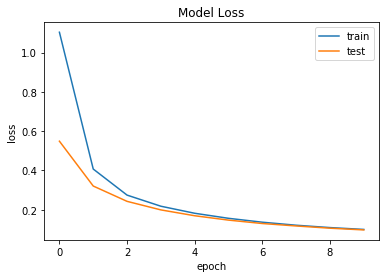

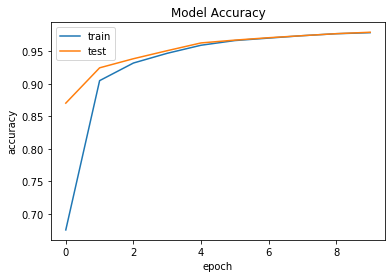

In [29]:
plot_loss(model_1H_history)
plot_acc(model_1H_history)

### 3.2 First Tuning Attempt: Train with More Epochs!

Before we attempt more sophisticated improvements, it is imperative to decide if our model training has converged.
An iterative training is said to converge when the changes in the loss function and accuracy would drop below a certain threshold.
For example, we may want to keep training until the change in accuracy in epoch *N* and *N+1* to be less then 0.1%.

**EXERCISE**
In the code cell below, simply call the model's `fit` function with more epochs.
You can decide the number of *additional* epochs to try.

In [30]:
"""Continue the training process by calling the `fit` function the second time.
Simply use the same values for all the other hyperparameters.
The training history is stored in `model_1H_history_p2` object (`p2` stands for "part 2").""";

#model_1H_history_p2 = model_1H.fit(#TODO...)

In [31]:
#RUNIT
# Try to re-run:

model_1H_history_p2 = model_1H.fit(train_features,
                                   train_L_onehot,
                                   epochs=15, batch_size=32,
                                   validation_data=(test_features, test_L_onehot),
                                   verbose=2)

Epoch 1/15
6827/6827 - 9s - loss: 0.0921 - accuracy: 0.9799 - val_loss: 0.0906 - val_accuracy: 0.9806
Epoch 2/15
6827/6827 - 9s - loss: 0.0860 - accuracy: 0.9811 - val_loss: 0.0854 - val_accuracy: 0.9821
Epoch 3/15
6827/6827 - 9s - loss: 0.0807 - accuracy: 0.9823 - val_loss: 0.0808 - val_accuracy: 0.9835
Epoch 4/15
6827/6827 - 9s - loss: 0.0761 - accuracy: 0.9840 - val_loss: 0.0760 - val_accuracy: 0.9838
Epoch 5/15
6827/6827 - 9s - loss: 0.0721 - accuracy: 0.9854 - val_loss: 0.0726 - val_accuracy: 0.9850
Epoch 6/15
6827/6827 - 9s - loss: 0.0688 - accuracy: 0.9866 - val_loss: 0.0694 - val_accuracy: 0.9849
Epoch 7/15
6827/6827 - 9s - loss: 0.0659 - accuracy: 0.9874 - val_loss: 0.0666 - val_accuracy: 0.9873
Epoch 8/15
6827/6827 - 9s - loss: 0.0633 - accuracy: 0.9880 - val_loss: 0.0650 - val_accuracy: 0.9867
Epoch 9/15
6827/6827 - 9s - loss: 0.0609 - accuracy: 0.9884 - val_loss: 0.0622 - val_accuracy: 0.9881
Epoch 10/15
6827/6827 - 9s - loss: 0.0588 - accuracy: 0.9887 - val_loss: 0.0597 - 

**QUESTIONS**:

1. At the end of the second call to the `fit()` function, how many total epochs was this model trained with?

2. Compare the accuracy of the model after the first and second rounds of training. What is the effect of the second round？

3. Estimate what would happen if we further increase the `epochs` value?

\#RUNIT

**Answers**:

1. In our case above, after the second round of training, we have trained the model for (10+15) = 25 epochs.

2. At the end of the first round of training, we got an accuracy of nearly 0.98;
   after the second round, it increases in accuracy to almost 0.99 (a 1 percent improvement!)

   ```
   # the end of first fit() training:
   Epoch 10/10
   6827/6827 - 12s - loss: 0.0996 - accuracy: 0.9785 - val_loss: 0.0970 - val_accuracy: 0.9792

   # the end of second fit() training:
   Epoch 15/15
   6827/6827 - 13s - loss: 0.0507 - accuracy: 0.9897 - val_loss: 0.0524 - val_accuracy: 0.9896
   ```
   <br/>
 
 3. With further training, the accuracy can continue to improve, but at slower and slower rates.
    One may risk overfitting the model. (See several extra rounds of training below.)

**EXERCISE**: Plot the progression of the loss function and accuracy in the second round of iteration (see variable `model_1H_history_p2`).

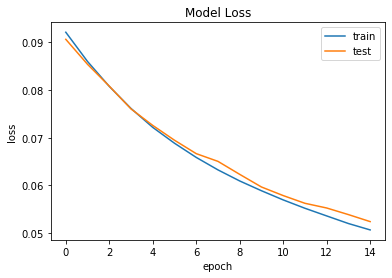

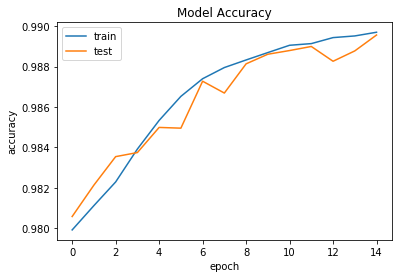

In [32]:
#RUNIT

plot_loss(model_1H_history_p2)
plot_acc(model_1H_history_p2)

*Hint*: You can run more training iterations as you see fit!
In other words, the `model_0.fit` can be called many times;
every time, it starts with the previously optimized model and further refines the parameters.

In [33]:
#RUNIT
# Try to re-run:

model_1H_history_p3 = model_1H.fit(train_features,
            train_L_onehot,
            epochs=25, batch_size=32,
            validation_data=(test_features, test_L_onehot),
            verbose=2)

Epoch 1/25
6827/6827 - 9s - loss: 0.0492 - accuracy: 0.9899 - val_loss: 0.0510 - val_accuracy: 0.9898
Epoch 2/25
6827/6827 - 9s - loss: 0.0480 - accuracy: 0.9902 - val_loss: 0.0506 - val_accuracy: 0.9897
Epoch 3/25
6827/6827 - 9s - loss: 0.0467 - accuracy: 0.9904 - val_loss: 0.0493 - val_accuracy: 0.9896
Epoch 4/25
6827/6827 - 9s - loss: 0.0456 - accuracy: 0.9905 - val_loss: 0.0478 - val_accuracy: 0.9903
Epoch 5/25
6827/6827 - 9s - loss: 0.0446 - accuracy: 0.9906 - val_loss: 0.0470 - val_accuracy: 0.9905
Epoch 6/25
6827/6827 - 9s - loss: 0.0436 - accuracy: 0.9907 - val_loss: 0.0460 - val_accuracy: 0.9906
Epoch 7/25
6827/6827 - 9s - loss: 0.0427 - accuracy: 0.9908 - val_loss: 0.0455 - val_accuracy: 0.9905
Epoch 8/25
6827/6827 - 9s - loss: 0.0419 - accuracy: 0.9908 - val_loss: 0.0449 - val_accuracy: 0.9900
Epoch 9/25
6827/6827 - 9s - loss: 0.0412 - accuracy: 0.9909 - val_loss: 0.0441 - val_accuracy: 0.9906
Epoch 10/25
6827/6827 - 9s - loss: 0.0404 - accuracy: 0.9910 - val_loss: 0.0428 - 

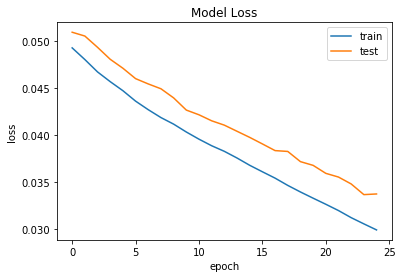

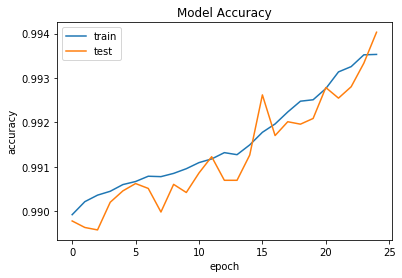

In [34]:
#RUNIT

plot_loss(model_1H_history_p3)
plot_acc(model_1H_history_p3)

In [35]:
#RUNIT
# Try to re-run:

model_1H_history_p4 = model_1H.fit(train_features,
            train_L_onehot,
            epochs=25, batch_size=32,
            validation_data=(test_features, test_L_onehot),
            verbose=2)

Epoch 1/25
6827/6827 - 9s - loss: 0.0294 - accuracy: 0.9937 - val_loss: 0.0326 - val_accuracy: 0.9935
Epoch 2/25
6827/6827 - 9s - loss: 0.0288 - accuracy: 0.9939 - val_loss: 0.0330 - val_accuracy: 0.9930
Epoch 3/25
6827/6827 - 9s - loss: 0.0283 - accuracy: 0.9940 - val_loss: 0.0328 - val_accuracy: 0.9936
Epoch 4/25
6827/6827 - 9s - loss: 0.0278 - accuracy: 0.9942 - val_loss: 0.0314 - val_accuracy: 0.9938
Epoch 5/25
6827/6827 - 9s - loss: 0.0273 - accuracy: 0.9943 - val_loss: 0.0311 - val_accuracy: 0.9939
Epoch 6/25
6827/6827 - 9s - loss: 0.0268 - accuracy: 0.9944 - val_loss: 0.0306 - val_accuracy: 0.9939
Epoch 7/25
6827/6827 - 9s - loss: 0.0264 - accuracy: 0.9944 - val_loss: 0.0304 - val_accuracy: 0.9944
Epoch 8/25
6827/6827 - 9s - loss: 0.0260 - accuracy: 0.9945 - val_loss: 0.0297 - val_accuracy: 0.9943
Epoch 9/25
6827/6827 - 9s - loss: 0.0256 - accuracy: 0.9946 - val_loss: 0.0300 - val_accuracy: 0.9940
Epoch 10/25
6827/6827 - 9s - loss: 0.0253 - accuracy: 0.9946 - val_loss: 0.0291 - 

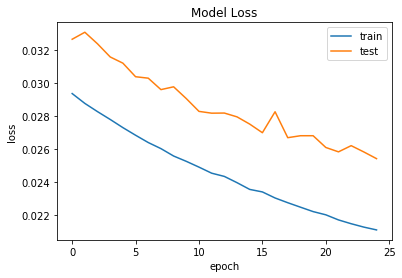

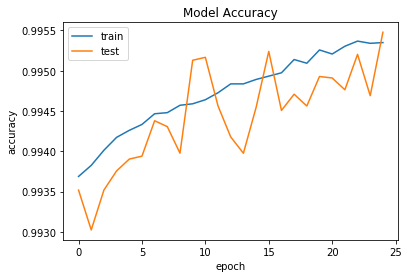

In [36]:
#RUNIT

plot_loss(model_1H_history_p4)
plot_acc(model_1H_history_p4)

\#RUNIT

#### Interesting Observations (for developers)

In the second re-run of `fit()`, the loss function has crossed over between the training and validation data.
The accuracy of the train and test data are still tracking each other but with greater and greater *apparent discrepancy*; but we have to realize the changes in the accuracy between successive epochs are getting smaller and smaller.

**QUESTION**: What are other adjustable hyperparameters in this model?

\#RUNIT

`hidden_neurons` (the number of neurons in the hidden layer), `epoch` and `batch_size` are three important hyperparameters.
Activation function can also be considered a hyperparameter that affects the architecture of the model.

<a id="sec-Model_Tuning_Methods"></a>
## 4 Model Tuning Methods

Now that we have built and trained the baseline neural network model, we will run a variety of experiments using different combinations of *hyperparameters*, in order to find the best performing model.
Below is a list of hyperparameters that could be interesting to explore; feel free to experiment with your own ideas as well.

We will use the `NN_Model_1H` with 18 neurons in the hidden layer as a baseline.
Starting from this model, let us: 

- Test with different numbers of neurons in the hidden layer: **12**, **8**, **4**, **2**, **1**
    - It is also worthwhile to test a higher number of neurons: **40**, **80**, or more
- Test with different learning rates: **0.0003**, **0.001**, **0.01**, **0.1**
- Test with different batch sizes: **16**, **32**, **64**, **128**, **512**, **1024**
- Test with different numbers of hidden layers: **2**, **3**, and so on

> **NOTE:**
> The easiest way to do this exploration is to simply copy the code cell where we constructed and trained the baseline model and paste it to a new cell below, since most of the parameters (`hidden_neurons`, `learning_rate`, `batch_size`, etc.) can be changed when calling the `NN_Model_1H` function or when fitting the model.
> However, to change the number of hidden layers (which we will do much later), the original `NN_model_1H` function must be duplicated and modified.

### 4.1 Tuning Experiments #1: Varying Number of Neurons in Hidden Layers

In this round of experiments, we create several variants of `NN_Model_1H` models with varying the `hidden_neurons` hyperparameter, i.e. the number of neurons in the hidden layer.
The accuracy and loss of each model will be assessed as a function of `hidden_neurons`.
All the other hyperparameters (e.g. learning rate, epochs, batch_size, number of hidden layers) will be kept constant; they will be varied later.
Not every number of hidden neurons is tested, so feel free to create new code cells with a different number of neurons as your curiousity leads you.

In [37]:
"""Construct & train a NN_Model_1H with 12 neurons in the hidden layer""";

#model_1H12N = NN_Model_1H(#TODO...)
#model_1H12N_history = model_1H12N.fit(#TODO...)

# Also plot the loss & accuracy (optional)

In [38]:
"""Construct & train a NN_Model_1H with 8 neurons in the hidden layer""";

#model_1H8N = NN_Model_1H(#TODO...)
#model_1H8N_history = #TODO

# Also plot the loss & accuracy (optional)

> ### Tips & Tricks for Experimental Runs
>
> Do you see the systematic names of the model and history variables, etc?
> The variable called `model_1H12N` means "a model with one hidden layer (`1H`) that has 12 neurons (`12N`)".
> The use of systematic names, albeit complicated, will be very helpful in keeping track of different experiments.
> For example, down below, we will have models with two hidden layers; such a model can be denoted by a variable name such as `model_2H18N12N`, etc.
>
> **DISCUSSION QUESTION:**
> Why don't we just name the variables `model1`, `model2`, `model3`, ...?
> What are the advantages and disadvantages of naming them with this schema?
>
> **Keeping track of experimental results**:
> At this stage, it may be helpful to keep track the final training accuracy (after 10 epochs) for each model with a distinct `hidden_neurons` value.
> You can use pen-and-paper, or build a spreadsheet with the following
> values:
>
> | `hidden_neurons` | `val_accuracy` |
> |------------------|----------------|
> |        1         |      ....      |
> |       ...        |      ....      |
> |       18         | 0.9792 (example) |
> |       ...        |      ....      |
> |       80         |      ....      |

**EXERCISES**: create additional code cells to run models with 4, 2, 1 neurons in the hidden layer

In [39]:
#TODO

**EXERCISES**: create more code cells to run models with 40 and 80 neurons in the hidden layer. *You are welcome to explore even higher numbers of hidden neurons. Observe carefully what happening!*

In [40]:
#TODO

\#RUNIT

#### Going in FEWER hidden neurons (vs input/output layers)

\#RUNIT
##### Model "1H12N": 12 neurons in the hidden layer

In [41]:
#RUNIT
# Reproducibility hacks!

np.random.seed(968172)
tf.random.set_seed(83018241)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 8s - loss: 1.1864 - accuracy: 0.6581 - val_loss: 0.6118 - val_accuracy: 0.8622
Epoch 2/10
6827/6827 - 9s - loss: 0.4592 - accuracy: 0.8992 - val_loss: 0.3700 - val_accuracy: 0.9217
Epoch 3/10
6827/6827 - 7s - loss: 0.3286 - accuracy: 0.9277 - val_loss: 0.2997 - val_accuracy: 0.9331
Epoch 4/10
6827/6827 - 7s - loss: 0.2803 - accuracy: 0.9349 - val_loss: 0.2659 - val_accuracy: 0.9381
Epoch 5/10
6827/6827 - 7s - loss: 0.2531 - accuracy: 0.9381 - val_loss: 0.2437 - val_accuracy: 0.9407
Epoch 6/10
6827/6827 - 9s - loss: 0.2328 - accuracy: 0.9413 - val_loss: 0.2253 - val_accuracy: 0.9448
Epoch 7/10
6827/6827 - 7s - loss: 0.2161 - accuracy: 0.9455 - val_loss: 0.2105 - val_accuracy: 0.9507
Epoch 8/10
6827/6827 - 7s - loss: 0.2026 - accuracy: 0.9496 - val_loss: 0.1983 - val_accuracy: 0.9549
Epoch 9/10
6827/6827 - 7s - loss: 0.1908 - accuracy: 0.9540 - val_loss: 0.1871 - val_accuracy: 0.9556
Epoch 10/10
6827/6827 - 9s - loss: 0.1777 - accuracy: 0.9565 - val_loss: 0.1731 - 

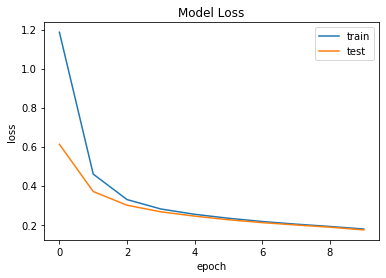

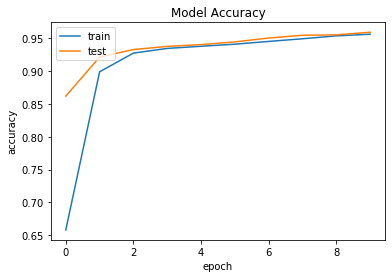

In [42]:
#RUNIT
# the model with 12 neurons in the hidden layer 
model_1H12N = NN_Model_1H(12,0.0003)
model_1H12N_history = model_1H12N.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=32,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_1H12N_history)
plot_acc(model_1H12N_history)

\#RUNIT

##### Model "1H8N": 8 neurons in the hidden layer

In [43]:
#RUNIT
# Reproducibility hacks!

np.random.seed(491717)
tf.random.set_seed(3901141)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 8s - loss: 1.4420 - accuracy: 0.5361 - val_loss: 0.9016 - val_accuracy: 0.7646
Epoch 2/10
6827/6827 - 7s - loss: 0.6984 - accuracy: 0.8269 - val_loss: 0.5523 - val_accuracy: 0.8674
Epoch 3/10
6827/6827 - 8s - loss: 0.4725 - accuracy: 0.8843 - val_loss: 0.4205 - val_accuracy: 0.8979
Epoch 4/10
6827/6827 - 7s - loss: 0.3848 - accuracy: 0.9112 - val_loss: 0.3640 - val_accuracy: 0.9167
Epoch 5/10
6827/6827 - 7s - loss: 0.3445 - accuracy: 0.9195 - val_loss: 0.3347 - val_accuracy: 0.9224
Epoch 6/10
6827/6827 - 7s - loss: 0.3217 - accuracy: 0.9235 - val_loss: 0.3158 - val_accuracy: 0.9258
Epoch 7/10
6827/6827 - 8s - loss: 0.3057 - accuracy: 0.9269 - val_loss: 0.3015 - val_accuracy: 0.9272
Epoch 8/10
6827/6827 - 7s - loss: 0.2935 - accuracy: 0.9302 - val_loss: 0.2909 - val_accuracy: 0.9323
Epoch 9/10
6827/6827 - 7s - loss: 0.2833 - accuracy: 0.9319 - val_loss: 0.2822 - val_accuracy: 0.9339
Epoch 10/10
6827/6827 - 7s - loss: 0.2747 - accuracy: 0.9341 - val_loss: 0.2734 - 

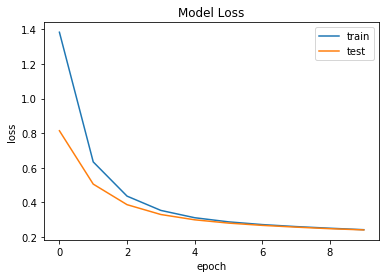

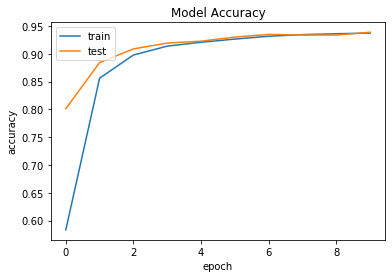

In [44]:
#RUNIT
model_1H8N = NN_Model_1H(8,0.0003)
model_1H8N_history = model_1H8N.fit(train_features,
                                    train_L_onehot,
                                    epochs=10, batch_size=32,
                                    validation_data=(test_features, test_L_onehot),
                                    verbose=2)
plot_loss(model_1H8N_history)
plot_acc(model_1H8N_history)

\#RUNIT

##### Model "1H4N": 4 neurons in the hidden layer

In [45]:
#RUNIT
# Reproducibility hacks!

np.random.seed(51568717)
tf.random.set_seed(314782)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 8s - loss: 1.6787 - accuracy: 0.4199 - val_loss: 1.2247 - val_accuracy: 0.5768
Epoch 2/10
6827/6827 - 7s - loss: 1.0693 - accuracy: 0.6315 - val_loss: 0.9432 - val_accuracy: 0.6934
Epoch 3/10
6827/6827 - 8s - loss: 0.8440 - accuracy: 0.7524 - val_loss: 0.7699 - val_accuracy: 0.7884
Epoch 4/10
6827/6827 - 8s - loss: 0.7248 - accuracy: 0.7993 - val_loss: 0.6817 - val_accuracy: 0.8122
Epoch 5/10
6827/6827 - 8s - loss: 0.6571 - accuracy: 0.8325 - val_loss: 0.6291 - val_accuracy: 0.8449
Epoch 6/10
6827/6827 - 8s - loss: 0.6146 - accuracy: 0.8495 - val_loss: 0.5927 - val_accuracy: 0.8491
Epoch 7/10
6827/6827 - 8s - loss: 0.5846 - accuracy: 0.8541 - val_loss: 0.5679 - val_accuracy: 0.8601
Epoch 8/10
6827/6827 - 8s - loss: 0.5640 - accuracy: 0.8572 - val_loss: 0.5498 - val_accuracy: 0.8783
Epoch 9/10
6827/6827 - 8s - loss: 0.5483 - accuracy: 0.8659 - val_loss: 0.5352 - val_accuracy: 0.8762
Epoch 10/10
6827/6827 - 8s - loss: 0.5347 - accuracy: 0.8701 - val_loss: 0.5208 - 

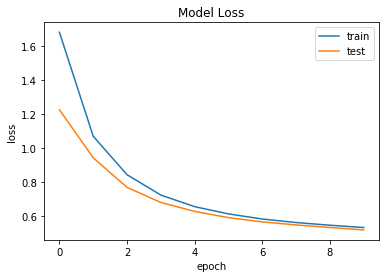

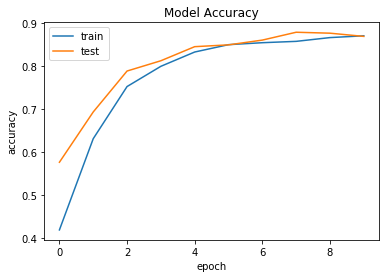

In [46]:
#RUNIT
model_1H4N = NN_Model_1H(4,0.0003)
model_1H4N_history = model_1H4N.fit(train_features,
                                    train_L_onehot,
                                    epochs=10, batch_size=32,
                                    validation_data=(test_features, test_L_onehot),
                                    verbose=2)
plot_loss(model_1H4N_history)
plot_acc(model_1H4N_history)

\#RUNIT

##### Model "1H2N": 2 neurons in the hidden layer

In [47]:
#RUNIT
# Reproducibility hacks!

np.random.seed(66962476)
tf.random.set_seed(41840828)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 9s - loss: 2.1385 - accuracy: 0.2973 - val_loss: 1.8072 - val_accuracy: 0.3491
Epoch 2/10
6827/6827 - 7s - loss: 1.6945 - accuracy: 0.3901 - val_loss: 1.6147 - val_accuracy: 0.4122
Epoch 3/10
6827/6827 - 7s - loss: 1.5603 - accuracy: 0.4286 - val_loss: 1.5186 - val_accuracy: 0.4345
Epoch 4/10
6827/6827 - 7s - loss: 1.4834 - accuracy: 0.4416 - val_loss: 1.4552 - val_accuracy: 0.4462
Epoch 5/10
6827/6827 - 7s - loss: 1.4283 - accuracy: 0.4535 - val_loss: 1.4069 - val_accuracy: 0.4610
Epoch 6/10
6827/6827 - 7s - loss: 1.3843 - accuracy: 0.4677 - val_loss: 1.3668 - val_accuracy: 0.4711
Epoch 7/10
6827/6827 - 7s - loss: 1.3467 - accuracy: 0.4811 - val_loss: 1.3322 - val_accuracy: 0.4803
Epoch 8/10
6827/6827 - 7s - loss: 1.3153 - accuracy: 0.4931 - val_loss: 1.3039 - val_accuracy: 0.4937
Epoch 9/10
6827/6827 - 8s - loss: 1.2892 - accuracy: 0.5089 - val_loss: 1.2802 - val_accuracy: 0.5120
Epoch 10/10
6827/6827 - 7s - loss: 1.2678 - accuracy: 0.5205 - val_loss: 1.2608 - 

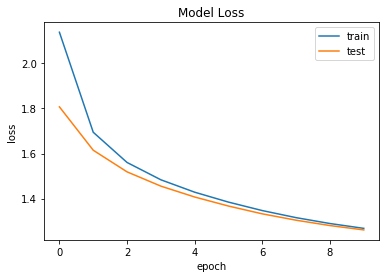

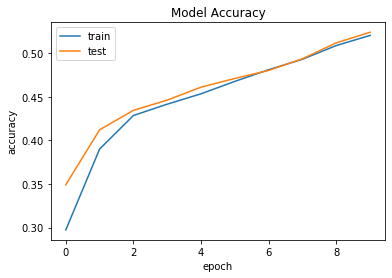

In [48]:
#RUNIT
model_1H2N = NN_Model_1H(2,0.0003)
model_1H2N_history = model_1H2N.fit(train_features,
                                    train_L_onehot,
                                    epochs=10, batch_size=32,
                                    validation_data=(test_features, test_L_onehot),
                                    verbose=2)
plot_loss(model_1H2N_history)
plot_acc(model_1H2N_history)

\#RUNIT

##### Model "1H1N": 1 neuron in the hidden layer

In [49]:
#RUNIT
# Reproducibility hacks!

np.random.seed(50383027)
tf.random.set_seed(72907479)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 8s - loss: 2.3351 - accuracy: 0.2485 - val_loss: 2.1355 - val_accuracy: 0.2752
Epoch 2/10
6827/6827 - 7s - loss: 2.0610 - accuracy: 0.2724 - val_loss: 2.0034 - val_accuracy: 0.2723
Epoch 3/10
6827/6827 - 7s - loss: 1.9741 - accuracy: 0.2745 - val_loss: 1.9494 - val_accuracy: 0.2825
Epoch 4/10
6827/6827 - 7s - loss: 1.9346 - accuracy: 0.2829 - val_loss: 1.9205 - val_accuracy: 0.2857
Epoch 5/10
6827/6827 - 7s - loss: 1.9118 - accuracy: 0.2885 - val_loss: 1.9036 - val_accuracy: 0.2934
Epoch 6/10
6827/6827 - 8s - loss: 1.8976 - accuracy: 0.2937 - val_loss: 1.8930 - val_accuracy: 0.3008
Epoch 7/10
6827/6827 - 7s - loss: 1.8883 - accuracy: 0.3000 - val_loss: 1.8856 - val_accuracy: 0.3009
Epoch 8/10
6827/6827 - 7s - loss: 1.8819 - accuracy: 0.3048 - val_loss: 1.8808 - val_accuracy: 0.3149
Epoch 9/10
6827/6827 - 7s - loss: 1.8774 - accuracy: 0.3097 - val_loss: 1.8772 - val_accuracy: 0.3114
Epoch 10/10
6827/6827 - 8s - loss: 1.8737 - accuracy: 0.3112 - val_loss: 1.8742 - 

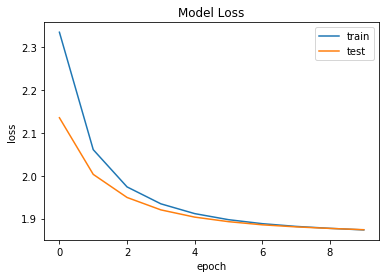

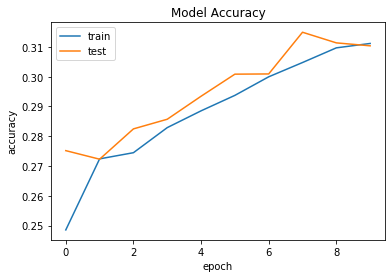

In [50]:
#RUNIT
model_1H1N = NN_Model_1H(1,0.0003)
model_1H1N_history = model_1H1N.fit(train_features,
                                    train_L_onehot,
                                    epochs=10, batch_size=32,
                                    validation_data=(test_features, test_L_onehot),
                                    verbose=2)
plot_loss(model_1H1N_history)
plot_acc(model_1H1N_history)

\#RUNIT

#### Going in the direction of MORE hidden neurons

##### Models "1H40N" & "1H80N": 40 & 80 neurons in the hidden layer

In [51]:
#RUNIT
# Reproducibility hacks!

np.random.seed(34294506)
tf.random.set_seed(1139397)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 9s - loss: 0.8427 - accuracy: 0.7706 - val_loss: 0.3632 - val_accuracy: 0.9180
Epoch 2/10
6827/6827 - 9s - loss: 0.2798 - accuracy: 0.9339 - val_loss: 0.2265 - val_accuracy: 0.9456
Epoch 3/10
6827/6827 - 9s - loss: 0.1958 - accuracy: 0.9533 - val_loss: 0.1706 - val_accuracy: 0.9637
Epoch 4/10
6827/6827 - 9s - loss: 0.1519 - accuracy: 0.9658 - val_loss: 0.1364 - val_accuracy: 0.9689
Epoch 5/10
6827/6827 - 9s - loss: 0.1226 - accuracy: 0.9718 - val_loss: 0.1113 - val_accuracy: 0.9733
Epoch 6/10
6827/6827 - 9s - loss: 0.1014 - accuracy: 0.9770 - val_loss: 0.0931 - val_accuracy: 0.9796
Epoch 7/10
6827/6827 - 9s - loss: 0.0864 - accuracy: 0.9805 - val_loss: 0.0810 - val_accuracy: 0.9815
Epoch 8/10
6827/6827 - 9s - loss: 0.0755 - accuracy: 0.9825 - val_loss: 0.0704 - val_accuracy: 0.9822
Epoch 9/10
6827/6827 - 9s - loss: 0.0667 - accuracy: 0.9848 - val_loss: 0.0632 - val_accuracy: 0.9874
Epoch 10/10
6827/6827 - 9s - loss: 0.0596 - accuracy: 0.9875 - val_loss: 0.0570 - 

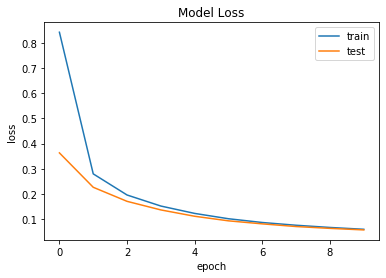

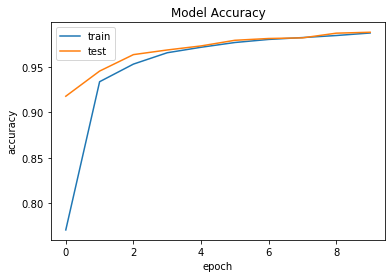

In [52]:
#RUNIT
model_1H40N = NN_Model_1H(40,0.0003)
model_1H40N_history = model_1H40N.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=32,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_1H40N_history)
plot_acc(model_1H40N_history)

In [53]:
#RUNIT
# Reproducibility hacks!

np.random.seed(4035104)
tf.random.set_seed(84845624)


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 9s - loss: 0.6815 - accuracy: 0.8244 - val_loss: 0.2710 - val_accuracy: 0.9327
Epoch 2/10
6827/6827 - 9s - loss: 0.2048 - accuracy: 0.9492 - val_loss: 0.1580 - val_accuracy: 0.9629
Epoch 3/10
6827/6827 - 9s - loss: 0.1291 - accuracy: 0.9708 - val_loss: 0.1058 - val_accuracy: 0.9786
Epoch 4/10
6827/6827 - 9s - loss: 0.0900 - accuracy: 0.9808 - val_loss: 0.0764 - val_accuracy: 0.9829
Epoch 5/10
6827/6827 - 9s - loss: 0.0669 - accuracy: 0.9865 - val_loss: 0.0587 - val_accuracy: 0.9888
Epoch 6/10
6827/6827 - 9s - loss: 0.0525 - accuracy: 0.9902 - val_loss: 0.0463 - val_accuracy: 0.9915
Epoch 7/10
6827/6827 - 9s - loss: 0.0424 - accuracy: 0.9919 - val_loss: 0.0377 - val_accuracy: 0.9925
Epoch 8/10
6827/6827 - 9s - loss: 0.0351 - accuracy: 0.9931 - val_loss: 0.0326 - val_accuracy: 0.9933
Epoch 9/10
6827/6827 - 9s - loss: 0.0299 - accuracy: 0.9939 - val_loss: 0.0282 - val_accuracy: 0.9943
Epoch 10/10
6827/6827 - 9s - loss: 0.0258 - accuracy: 0.9945 - val_loss: 0.0244 - 

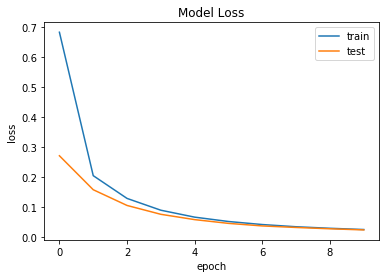

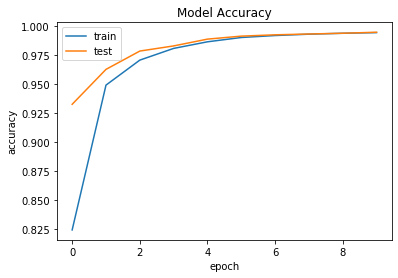

In [54]:
#RUNIT
model_1H80N = NN_Model_1H(80,0.0003)
model_1H80N_history = model_1H80N.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=32,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_1H80N_history)
plot_acc(model_1H80N_history)

#### Takeaways from Tuning Experiment #1

In the first experiment above, we tuned the `NN_Model_1H` model by varying the `hidden_neurons` hyperparameter.

**CHALLENGE QUESTION**:
Please plot the final model accuracies against the number of hidden neurons.

> *Hint*: you can do this in many ways!
> If you have kept track the accuracy vs. `hidden_neurons` table elsewhere, you can plot the results on a spreadsheet software (Google Sheets, Microsoft Excel, etc.).
>  In this Python session, the final model accuracy can be found in the model history objects returned by the `fit()` function calls above.
>  For example, the final accuracy from the model with 12 hidden neurons should be found in `model_1H12N_history.history['val_accuracy'][-1]`
>  (which should be close to 0.96).

In [ ]:
"""(Optional) Use this cell to generate the plot of val_acc vs. hidden_neurons:"""

## Example:

# expt1_acc = [
#    (1, model_1H1N_history['val_accuracy'][-1]),
#    # ... fill in the other values here
#    (12, model_1H12N_history['val_accuracy'][-1]),
#    # ... fill in the other values here
# ]

## Construct a dataframe from expt1_acc

# df_expt1_acc = pd.DataFrame(#TODO)

## Plot the data as an x-y line plot

# df_expt1_acc.plot.line(#TODO)

In [55]:
#RUNIT

def get_val_acc(hist):
    return hist.history['val_accuracy'][-1]

In [56]:
#RUNIT
model_1H12N_history.history['val_accuracy'][-1]

0.9592793583869934

In [57]:
#RUNIT
expt1_acc = [
    (1, get_val_acc(model_1H1N_history)),
    (2, get_val_acc(model_1H2N_history)),
    (4, get_val_acc(model_1H4N_history)),
    (8, get_val_acc(model_1H8N_history)),
    (12, get_val_acc(model_1H12N_history)),
    (18, get_val_acc(model_1H_history)),
    (40, get_val_acc(model_1H40N_history)),
    (80, get_val_acc(model_1H80N_history)),
]

In [58]:
#RUNIT
df_expt1_acc = pd.DataFrame(expt1_acc, columns=['hidden_N', 'val_accuracy'])
df_expt1_acc

hidden_N  val_accuracy
0         1      0.310367
1         2      0.524095
2         4      0.868701
3         8      0.936154
4        12      0.959279
5        18      0.979219
6        40      0.988447
7        80      0.994800

Text(0.5, 1.0, 'Tuning Expt #1: Accuracy vs num of hidden neurons')

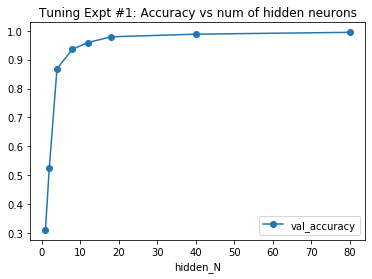

In [59]:
#RUNIT
df_expt1_acc.plot.line(x='hidden_N', y='val_accuracy', style='o-')
plt.title("Tuning Expt #1: Accuracy vs num of hidden neurons")

In [60]:
#RUNIT
[ d for d in globals() if d.startswith('model_1H') and d.endswith('_history') ]

['model_1H_history',
 'model_1H12N_history',
 'model_1H8N_history',
 'model_1H4N_history',
 'model_1H2N_history',
 'model_1H1N_history',
 'model_1H40N_history',
 'model_1H80N_history']

**QUESTIONS**:
Let us recap what we learned from this experiments by answering the following questions:

  * What happened to the model's accuracy when we reduce `hidden_neurons`?
    Describe the change in the accuracy of the model as we reduced `hidden_neurons` to an extremely small number.

  * What happened to the accuracy if we increase `hidden_neurons`?
    Discuss (or observe) what would happen if the hidden layer contains 1000 or even 10000 hidden neurons?


> *In conclusion:
> In order to improve the accuracy of the model, we should use \_____ (more or less?) hidden neurons.*


**DISCUSSION**: What is an optimal value of `hidden_neurons` that will yield the desirable level of accuracy?
For example, what is the value of `hidden_neurons` that will yield a 99% model accuracy? How about 99.5% accuracy? Can we reach 99.9% accuracy?
Keep in mind that neural network model training is very expensive; increasing this hyperparameter may not improve the model significantly!

\#RUNIT

#### Deciding an Optimal Hyperparameter

The example above shows a common theme with model tuning.
The more neurons we train, the more accuracy we can achieve (subject to risk of overfitting, see below).
You should have observed that at large enough `hidden_neurons`, the model accuracy started to level off (i.e. adding more neurons will not give significant gain in accuracy)?

Since training a neural network model is very expensive, we often have to make a trade-off between doing more trainings (which can be very costly, so may not be possible), and conserving effort against "point of diminishing return", i.e. the point where improving the model does not yield a significant benefit in the model's accuracy.

**Where is the point of diminishing return?**

This depends on the application.
In some application we may really want to get as close as possible to 100%, then we have no choice but train more (bite the bullet).

\#RUNIT


**Some observations:** -- FIXME Under Construction


*** (Hide this cell until we're ready)

* Compared to the more expensive network down below (2 hidden layers, @ 18 neurons each), it seems like we can gain the same accuracy (~0.988) with 1 hidden layer @ 40 neurons

### 4.2 Tuning Experiment #2: Varying Learning Rate

In this batch of experiment, the accuracy and loss function of each model will be compared while changing the 'learning rate'.
For simplicity, all the other parameters (e.g. the number of neurons, epochs, batch_size, hidden layers) will be kept constant.
The one hidden layer with 18 neurons model will be used.
Not every number of learning rate is tested, so feel free to create new code cells with a different learning rate.

In [61]:
"""Construct & train a NN_Model_1H with 18 neurons in the hidden layer & learning rate=0.0003""";

#model_1H18N_LR0_0003 = NN_Model_1H(#TODO...)
#model_1H18N_LR0_0003_history = #TODO

# Also plot the loss & accuracy (optional)


**TODO**

... (create additional code cells to run models (`1H18N`) with larger learning rates: **0.001**, **0.01**,**0.1**)

\#RUNIT

#### Model "1H18N" With Learning Rate 0.0003

In [62]:
#RUNIT
# Reproducibility hacks!

np.random.seed(968172)
tf.random.set_seed(83018241)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 9s - loss: 1.1029 - accuracy: 0.6803 - val_loss: 0.5063 - val_accuracy: 0.8949
Epoch 2/10
6827/6827 - 7s - loss: 0.3616 - accuracy: 0.9233 - val_loss: 0.2791 - val_accuracy: 0.9413
Epoch 3/10
6827/6827 - 7s - loss: 0.2377 - accuracy: 0.9498 - val_loss: 0.2081 - val_accuracy: 0.9534
Epoch 4/10
6827/6827 - 7s - loss: 0.1850 - accuracy: 0.9585 - val_loss: 0.1679 - val_accuracy: 0.9620
Epoch 5/10
6827/6827 - 7s - loss: 0.1517 - accuracy: 0.9653 - val_loss: 0.1397 - val_accuracy: 0.9676
Epoch 6/10
6827/6827 - 7s - loss: 0.1287 - accuracy: 0.9705 - val_loss: 0.1209 - val_accuracy: 0.9725
Epoch 7/10
6827/6827 - 7s - loss: 0.1129 - accuracy: 0.9741 - val_loss: 0.1079 - val_accuracy: 0.9736
Epoch 8/10
6827/6827 - 7s - loss: 0.1016 - accuracy: 0.9757 - val_loss: 0.0982 - val_accuracy: 0.9770
Epoch 9/10
6827/6827 - 7s - loss: 0.0929 - accuracy: 0.9772 - val_loss: 0.0905 - val_accuracy: 0.9770
Epoch 10/10
6827/6827 - 7s - loss: 0.0859 - accuracy: 0.9787 - val_loss: 0.0847 - 

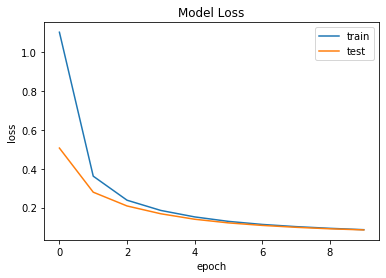

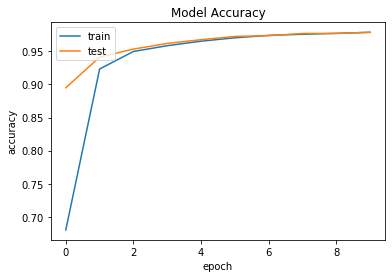

In [63]:
#RUNIT
# the model with 18 neurons in the hidden layer 
model_1H18N_LR0_0003 = NN_Model_1H(18,0.0003)
model_1H18N_LR0_0003_history = model_1H18N_LR0_0003.fit(train_features,
                                                        train_L_onehot,
                                                        epochs=10, batch_size=32,
                                                        validation_data=(test_features, test_L_onehot),
                                                        verbose=2)
plot_loss(model_1H18N_LR0_0003_history)
plot_acc(model_1H18N_LR0_0003_history)

\#RUNIT

#### Model "1H18N" with Learning Rate 0.001

In [64]:
#RUNIT
# Reproducibility hacks!

np.random.seed(31254389)
tf.random.set_seed(49358903)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 8s - loss: 0.5687 - accuracy: 0.8485 - val_loss: 0.2241 - val_accuracy: 0.9488
Epoch 2/10
6827/6827 - 7s - loss: 0.1676 - accuracy: 0.9621 - val_loss: 0.1305 - val_accuracy: 0.9677
Epoch 3/10
6827/6827 - 7s - loss: 0.1106 - accuracy: 0.9740 - val_loss: 0.0954 - val_accuracy: 0.9750
Epoch 4/10
6827/6827 - 7s - loss: 0.0856 - accuracy: 0.9785 - val_loss: 0.0769 - val_accuracy: 0.9804
Epoch 5/10
6827/6827 - 7s - loss: 0.0712 - accuracy: 0.9827 - val_loss: 0.0656 - val_accuracy: 0.9829
Epoch 6/10
6827/6827 - 7s - loss: 0.0607 - accuracy: 0.9860 - val_loss: 0.0548 - val_accuracy: 0.9886
Epoch 7/10
6827/6827 - 7s - loss: 0.0523 - accuracy: 0.9884 - val_loss: 0.0507 - val_accuracy: 0.9893
Epoch 8/10
6827/6827 - 7s - loss: 0.0467 - accuracy: 0.9896 - val_loss: 0.0450 - val_accuracy: 0.9891
Epoch 9/10
6827/6827 - 7s - loss: 0.0418 - accuracy: 0.9903 - val_loss: 0.0402 - val_accuracy: 0.9902
Epoch 10/10
6827/6827 - 7s - loss: 0.0381 - accuracy: 0.9912 - val_loss: 0.0364 - 

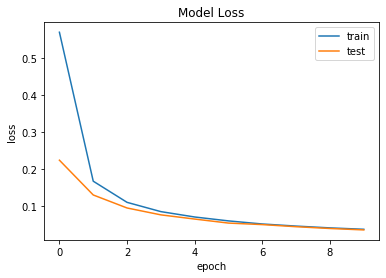

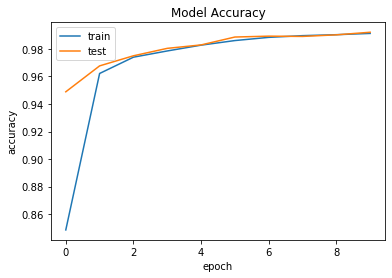

In [65]:
#RUNIT
# the model with 18 neurons in the hidden layer 
model_1H18N_LR0_001 = NN_Model_1H(18,0.001)
model_1H18N_LR0_001_history = model_1H18N_LR0_001.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=32,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_1H18N_LR0_001_history)
plot_acc(model_1H18N_LR0_001_history)

\#RUNIT

#### Model "1H18N" with Learning Rate 0.01

In [66]:
#RUNIT
# Reproducibility hacks!

np.random.seed(78642393)
tf.random.set_seed(45273894)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 8s - loss: 0.1862 - accuracy: 0.9504 - val_loss: 0.0835 - val_accuracy: 0.9769
Epoch 2/10
6827/6827 - 7s - loss: 0.0659 - accuracy: 0.9841 - val_loss: 0.0459 - val_accuracy: 0.9903
Epoch 3/10
6827/6827 - 7s - loss: 0.0500 - accuracy: 0.9884 - val_loss: 0.0506 - val_accuracy: 0.9860
Epoch 4/10
6827/6827 - 7s - loss: 0.0428 - accuracy: 0.9899 - val_loss: 0.0575 - val_accuracy: 0.9907
Epoch 5/10
6827/6827 - 9s - loss: 0.0395 - accuracy: 0.9904 - val_loss: 0.0441 - val_accuracy: 0.9919
Epoch 6/10
6827/6827 - 7s - loss: 0.0381 - accuracy: 0.9918 - val_loss: 0.0311 - val_accuracy: 0.9936
Epoch 7/10
6827/6827 - 7s - loss: 0.0354 - accuracy: 0.9919 - val_loss: 0.0367 - val_accuracy: 0.9894
Epoch 8/10
6827/6827 - 7s - loss: 0.0333 - accuracy: 0.9924 - val_loss: 0.0276 - val_accuracy: 0.9931
Epoch 9/10
6827/6827 - 7s - loss: 0.0312 - accuracy: 0.9927 - val_loss: 0.0227 - val_accuracy: 0.9954
Epoch 10/10
6827/6827 - 7s - loss: 0.0334 - accuracy: 0.9932 - val_loss: 0.0349 - 

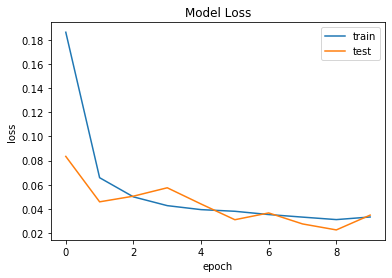

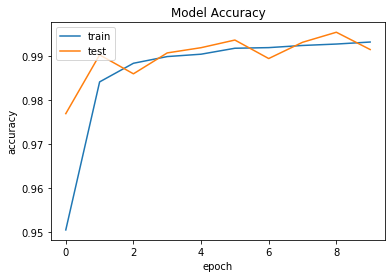

In [67]:
#RUNIT
# the model with 18 neurons in the hidden layer 
model_1H18N_LR0_01 = NN_Model_1H(18,0.01)
model_1H18N_LR0_01_history = model_1H18N_LR0_01.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=32,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_1H18N_LR0_01_history)
plot_acc(model_1H18N_LR0_01_history)

\#RUNIT

#### Model "1H18N" with Learning Rate 0.1

In [68]:
#RUNIT
# Reproducibility hacks!

np.random.seed(5823332)
tf.random.set_seed(198173894)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 9s - loss: 0.4806 - accuracy: 0.9238 - val_loss: 0.2683 - val_accuracy: 0.9397
Epoch 2/10
6827/6827 - 9s - loss: 0.2867 - accuracy: 0.9343 - val_loss: 0.2972 - val_accuracy: 0.9402
Epoch 3/10
6827/6827 - 9s - loss: 0.4591 - accuracy: 0.9364 - val_loss: 0.2503 - val_accuracy: 0.9670
Epoch 4/10
6827/6827 - 7s - loss: 0.5727 - accuracy: 0.9405 - val_loss: 0.9521 - val_accuracy: 0.9330
Epoch 5/10
6827/6827 - 9s - loss: 0.3540 - accuracy: 0.9367 - val_loss: 0.2588 - val_accuracy: 0.9394
Epoch 6/10
6827/6827 - 9s - loss: 0.3486 - accuracy: 0.9334 - val_loss: 0.4348 - val_accuracy: 0.9317
Epoch 7/10
6827/6827 - 9s - loss: 0.4706 - accuracy: 0.9351 - val_loss: 0.3515 - val_accuracy: 0.9147
Epoch 8/10
6827/6827 - 9s - loss: 0.3282 - accuracy: 0.9322 - val_loss: 0.2421 - val_accuracy: 0.9375
Epoch 9/10
6827/6827 - 7s - loss: 0.3283 - accuracy: 0.9327 - val_loss: 0.3710 - val_accuracy: 0.9440
Epoch 10/10
6827/6827 - 9s - loss: 0.3883 - accuracy: 0.9245 - val_loss: 0.2722 - 

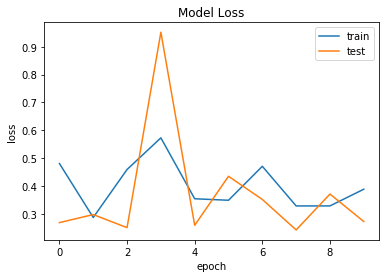

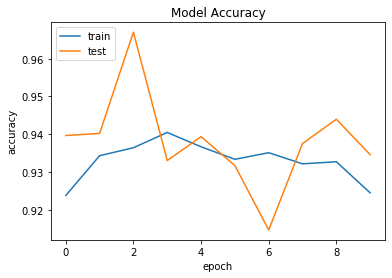

In [69]:
#RUNIT
# the model with 18 neurons in the hidden layer 
model_1H18N_LR0_1 = NN_Model_1H(18,0.1)
model_1H18N_LR0_1_history = model_1H18N_LR0_1.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=32,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_1H18N_LR0_1_history)
plot_acc(model_1H18N_LR0_1_history)

#### Takeaways from Tuning Experiments #2

Answer the questions below to recap what we learn about the effects of the learning rate.

**QUESTIONS**

1. What do you observe when we train the network with a small learning rate?

2. What happens to the training process when we increase the learning rate?

3. What happens to the training process when we increase the learning rate even further (to very large values)? Try a value of 0.1 or larger if you have not already.

4. What value of learning rate would you choose, and why? 


\#RUNIT

**SOLUTIONS**

1) When the learning rate is small, the updates to the weights and biases are small. This may cause the training process to converge slowly, requiring more iterations to achieve good results.

2) When the learning rate is large, the update magnitude of weights and biases increases，which can lead to faster training up to a certain value of learning rate.

3) Beyond this sweet spot, oscillations or instability may occur during training, or even failure to converge to a good solution.
Learning rate of 0.01 seems to be good, but the validation accuracy shows an oscillation toward the latter epochs.
Learning rates of 0.1 or larger are indeed not good.

4) Choosing an appropriate learning rate is one of the key factors when training a neural network, and it needs to be adjusted and optimized according to specific problems and experimental results.

**Important Takeaway**: Choosing an appropriate learning rate is one of the key factors when training a neural network, and it needs to be adjusted and optimized according to the specific problems and experimental results.

### 4.3 Tuning Experiments #3: Varying Batch Size

The accuracy and loss of each model will be compared while changing the 'batch size'.
For simplicity, all other parameters (e.g. learning rate, epochs, number of neurons, hidden layers) will be kept constant.
The one hidden layer with 18 neurons model will be used.
Not every number of batch size is tested, so feel free to create new code cells with a different number of batch size.

**TODO**

... (create additional code cells to run models (`1H18N`) with larger batch sizes, e.g. 16, 32, 64, 128, 512, 1024, ...).
Remember that we have the original batch_size=16.

### Model "1H18N" With Batch Size 16

In [70]:
#RUNIT
# Reproducibility hacks!

np.random.seed(968172)
tf.random.set_seed(83018241)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
13654/13654 - 15s - loss: 0.8238 - accuracy: 0.7727 - val_loss: 0.3321 - val_accuracy: 0.9270
Epoch 2/10
13654/13654 - 14s - loss: 0.2556 - accuracy: 0.9389 - val_loss: 0.2078 - val_accuracy: 0.9495
Epoch 3/10
13654/13654 - 14s - loss: 0.1765 - accuracy: 0.9567 - val_loss: 0.1512 - val_accuracy: 0.9634
Epoch 4/10
13654/13654 - 14s - loss: 0.1350 - accuracy: 0.9688 - val_loss: 0.1211 - val_accuracy: 0.9720
Epoch 5/10
13654/13654 - 14s - loss: 0.1113 - accuracy: 0.9748 - val_loss: 0.1021 - val_accuracy: 0.9773
Epoch 6/10
13654/13654 - 14s - loss: 0.0962 - accuracy: 0.9792 - val_loss: 0.0899 - val_accuracy: 0.9811
Epoch 7/10
13654/13654 - 14s - loss: 0.0850 - accuracy: 0.9815 - val_loss: 0.0809 - val_accuracy: 0.9824
Epoch 8/10
13654/13654 - 14s - loss: 0.0767 - accuracy: 0.9829 - val_loss: 0.0734 - val_accuracy: 0.9826
Epoch 9/10
13654/13654 - 14s - loss: 0.0700 - accuracy: 0.9846 - val_loss: 0.0679 - val_accuracy: 0.9862
Epoch 10/10
13654/13654 - 14s - loss: 0.0647 - accuracy

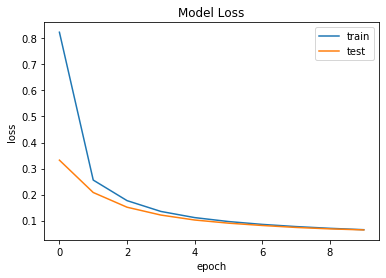

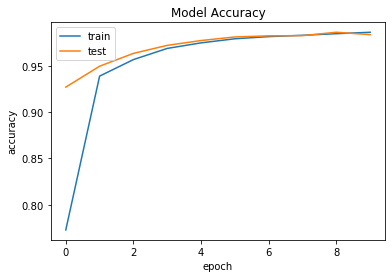

In [71]:
#RUNIT
# the model with 18 neurons in the hidden layer 
model_1H18N_BS16 = NN_Model_1H(18,0.0003)
model_1H18N_BS16_history = model_1H18N_BS16.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=16,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_1H18N_BS16_history)
plot_acc(model_1H18N_BS16_history)

### Model "1H18N" With Batch Size 32

In [72]:
#RUNIT
# Reproducibility hacks!

np.random.seed(968172)
tf.random.set_seed(83018241)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 9s - loss: 1.1029 - accuracy: 0.6803 - val_loss: 0.5063 - val_accuracy: 0.8949
Epoch 2/10
6827/6827 - 9s - loss: 0.3616 - accuracy: 0.9233 - val_loss: 0.2791 - val_accuracy: 0.9413
Epoch 3/10
6827/6827 - 7s - loss: 0.2377 - accuracy: 0.9498 - val_loss: 0.2081 - val_accuracy: 0.9534
Epoch 4/10
6827/6827 - 9s - loss: 0.1850 - accuracy: 0.9585 - val_loss: 0.1679 - val_accuracy: 0.9620
Epoch 5/10
6827/6827 - 9s - loss: 0.1517 - accuracy: 0.9653 - val_loss: 0.1397 - val_accuracy: 0.9676
Epoch 6/10
6827/6827 - 10s - loss: 0.1287 - accuracy: 0.9705 - val_loss: 0.1209 - val_accuracy: 0.9725
Epoch 7/10
6827/6827 - 9s - loss: 0.1129 - accuracy: 0.9741 - val_loss: 0.1079 - val_accuracy: 0.9736
Epoch 8/10
6827/6827 - 9s - loss: 0.1016 - accuracy: 0.9757 - val_loss: 0.0982 - val_accuracy: 0.9770
Epoch 9/10
6827/6827 - 12s - loss: 0.0929 - accuracy: 0.9772 - val_loss: 0.0905 - val_accuracy: 0.9770
Epoch 10/10
6827/6827 - 9s - loss: 0.0859 - accuracy: 0.9787 - val_loss: 0.0847 

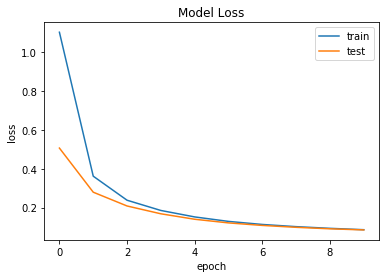

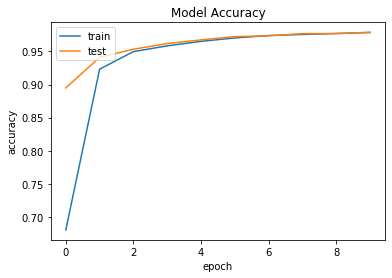

In [73]:
#RUNIT
# the model with 18 neurons in the hidden layer 
model_1H18N_BS32 = NN_Model_1H(18,0.0003)
model_1H18N_BS32_history = model_1H18N_BS32.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=32,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_1H18N_BS32_history)
plot_acc(model_1H18N_BS32_history)

### Model "1H18N" With Batch Size 64

In [74]:
#RUNIT
# Reproducibility hacks!

np.random.seed(968172)
tf.random.set_seed(83018241)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
3414/3414 - 5s - loss: 1.4388 - accuracy: 0.5565 - val_loss: 0.8041 - val_accuracy: 0.7991
Epoch 2/10
3414/3414 - 4s - loss: 0.5776 - accuracy: 0.8707 - val_loss: 0.4256 - val_accuracy: 0.9052
Epoch 3/10
3414/3414 - 4s - loss: 0.3546 - accuracy: 0.9216 - val_loss: 0.3060 - val_accuracy: 0.9325
Epoch 4/10
3414/3414 - 5s - loss: 0.2738 - accuracy: 0.9401 - val_loss: 0.2500 - val_accuracy: 0.9453
Epoch 5/10
3414/3414 - 4s - loss: 0.2294 - accuracy: 0.9504 - val_loss: 0.2141 - val_accuracy: 0.9519
Epoch 6/10
3414/3414 - 4s - loss: 0.1987 - accuracy: 0.9556 - val_loss: 0.1875 - val_accuracy: 0.9568
Epoch 7/10
3414/3414 - 4s - loss: 0.1750 - accuracy: 0.9597 - val_loss: 0.1665 - val_accuracy: 0.9612
Epoch 8/10
3414/3414 - 4s - loss: 0.1554 - accuracy: 0.9637 - val_loss: 0.1490 - val_accuracy: 0.9654
Epoch 9/10
3414/3414 - 4s - loss: 0.1397 - accuracy: 0.9671 - val_loss: 0.1349 - val_accuracy: 0.9674
Epoch 10/10
3414/3414 - 4s - loss: 0.1271 - accuracy: 0.9715 - val_loss: 0.1236 - 

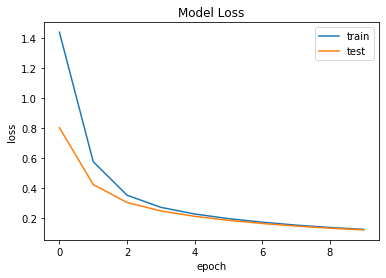

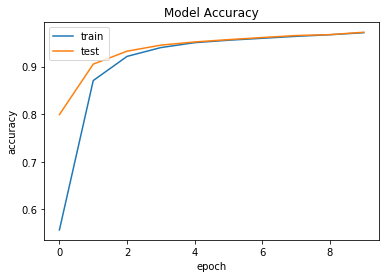

In [75]:
#RUNIT
# the model with 18 neurons in the hidden layer 
model_1H18N_BS64 = NN_Model_1H(18,0.0003)
model_1H18N_BS64_history = model_1H18N_BS64.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=64,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_1H18N_BS64_history)
plot_acc(model_1H18N_BS64_history)

### Model "1H18N" With Batch Size 128

In [76]:
#RUNIT
# Reproducibility hacks!

np.random.seed(968172)
tf.random.set_seed(83018241)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1707/1707 - 3s - loss: 1.8142 - accuracy: 0.4222 - val_loss: 1.1781 - val_accuracy: 0.6166
Epoch 2/10
1707/1707 - 2s - loss: 0.9118 - accuracy: 0.7627 - val_loss: 0.7089 - val_accuracy: 0.8346
Epoch 3/10
1707/1707 - 2s - loss: 0.5814 - accuracy: 0.8680 - val_loss: 0.4835 - val_accuracy: 0.8870
Epoch 4/10
1707/1707 - 2s - loss: 0.4178 - accuracy: 0.8995 - val_loss: 0.3700 - val_accuracy: 0.9097
Epoch 5/10
1707/1707 - 2s - loss: 0.3344 - accuracy: 0.9209 - val_loss: 0.3081 - val_accuracy: 0.9280
Epoch 6/10
1707/1707 - 2s - loss: 0.2854 - accuracy: 0.9337 - val_loss: 0.2688 - val_accuracy: 0.9384
Epoch 7/10
1707/1707 - 2s - loss: 0.2521 - accuracy: 0.9426 - val_loss: 0.2398 - val_accuracy: 0.9471
Epoch 8/10
1707/1707 - 2s - loss: 0.2262 - accuracy: 0.9491 - val_loss: 0.2164 - val_accuracy: 0.9505
Epoch 9/10
1707/1707 - 2s - loss: 0.2052 - accuracy: 0.9528 - val_loss: 0.1972 - val_accuracy: 0.9536
Epoch 10/10
1707/1707 - 2s - loss: 0.1879 - accuracy: 0.9550 - val_loss: 0.1814 - 

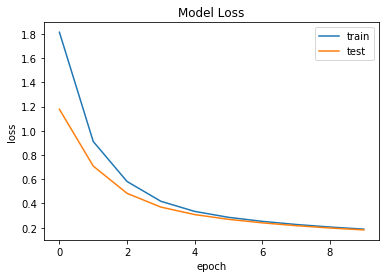

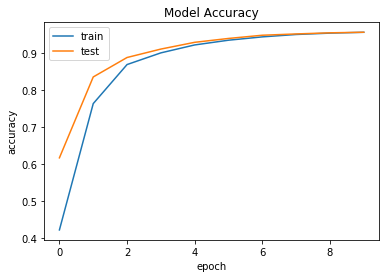

In [77]:
#RUNIT
# the model with 18 neurons in the hidden layer 
model_1H18N_BS128 = NN_Model_1H(18,0.0003)
model_1H18N_BS128_history = model_1H18N_BS128.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=128,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_1H18N_BS128_history)
plot_acc(model_1H18N_BS128_history)

### Model "1H18N" With Batch Size 512

In [78]:
#RUNIT
# Reproducibility hacks!

np.random.seed(968172)
tf.random.set_seed(83018241)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
427/427 - 1s - loss: 2.5478 - accuracy: 0.2648 - val_loss: 2.0955 - val_accuracy: 0.3152
Epoch 2/10
427/427 - 1s - loss: 1.8088 - accuracy: 0.4025 - val_loss: 1.5753 - val_accuracy: 0.4566
Epoch 3/10
427/427 - 1s - loss: 1.4084 - accuracy: 0.5331 - val_loss: 1.2653 - val_accuracy: 0.5890
Epoch 4/10
427/427 - 1s - loss: 1.1491 - accuracy: 0.6474 - val_loss: 1.0477 - val_accuracy: 0.6946
Epoch 5/10
427/427 - 1s - loss: 0.9598 - accuracy: 0.7376 - val_loss: 0.8844 - val_accuracy: 0.7828
Epoch 6/10
427/427 - 1s - loss: 0.8154 - accuracy: 0.8087 - val_loss: 0.7568 - val_accuracy: 0.8250
Epoch 7/10
427/427 - 1s - loss: 0.6995 - accuracy: 0.8407 - val_loss: 0.6515 - val_accuracy: 0.8484
Epoch 8/10
427/427 - 1s - loss: 0.6063 - accuracy: 0.8697 - val_loss: 0.5704 - val_accuracy: 0.8790
Epoch 9/10
427/427 - 1s - loss: 0.5349 - accuracy: 0.8828 - val_loss: 0.5077 - val_accuracy: 0.8848
Epoch 10/10
427/427 - 1s - loss: 0.4792 - accuracy: 0.8887 - val_loss: 0.4581 - val_accuracy: 0.8906

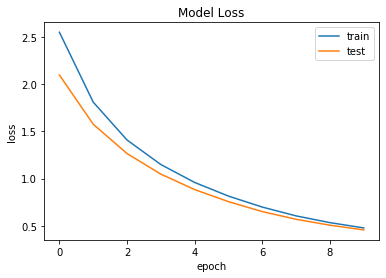

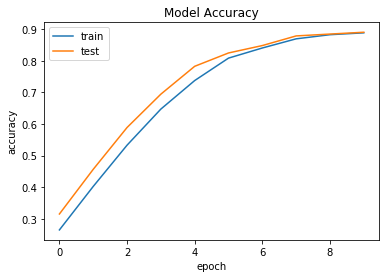

In [79]:
#RUNIT
# the model with 18 neurons in the hidden layer 
model_1H18N_BS512 = NN_Model_1H(18,0.0003)
model_1H18N_BS512_history = model_1H18N_BS512.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=512,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_1H18N_BS512_history)
plot_acc(model_1H18N_BS512_history)

### Model "1H18N" With Batch Size 1024

In [80]:
#RUNIT
# Reproducibility hacks!

np.random.seed(968172)
tf.random.set_seed(83018241)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
214/214 - 1s - loss: 2.7688 - accuracy: 0.2434 - val_loss: 2.5636 - val_accuracy: 0.3167
Epoch 2/10
214/214 - 1s - loss: 2.3085 - accuracy: 0.3085 - val_loss: 2.0787 - val_accuracy: 0.3201
Epoch 3/10
214/214 - 1s - loss: 1.9158 - accuracy: 0.3856 - val_loss: 1.7679 - val_accuracy: 0.4188
Epoch 4/10
214/214 - 1s - loss: 1.6514 - accuracy: 0.4357 - val_loss: 1.5421 - val_accuracy: 0.4649
Epoch 5/10
214/214 - 1s - loss: 1.4515 - accuracy: 0.5100 - val_loss: 1.3691 - val_accuracy: 0.5613
Epoch 6/10
214/214 - 1s - loss: 1.2958 - accuracy: 0.5860 - val_loss: 1.2295 - val_accuracy: 0.6109
Epoch 7/10
214/214 - 1s - loss: 1.1667 - accuracy: 0.6487 - val_loss: 1.1110 - val_accuracy: 0.6735
Epoch 8/10
214/214 - 1s - loss: 1.0568 - accuracy: 0.6860 - val_loss: 1.0103 - val_accuracy: 0.7002
Epoch 9/10
214/214 - 1s - loss: 0.9632 - accuracy: 0.7167 - val_loss: 0.9237 - val_accuracy: 0.7638
Epoch 10/10
214/214 - 1s - loss: 0.8815 - accuracy: 0.7684 - val_loss: 0.8473 - val_accuracy: 0.8006

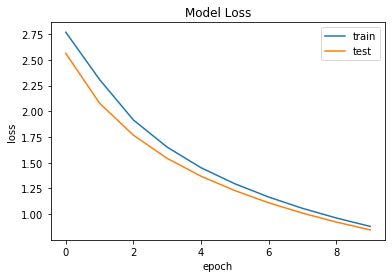

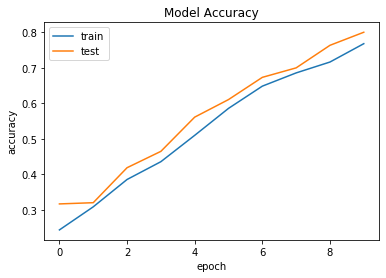

In [81]:
#RUNIT
# the model with 18 neurons in the hidden layer 
model_1H18N_BS1024 = NN_Model_1H(18,0.0003)
model_1H18N_BS1024_history = model_1H18N_BS1024.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=1024,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_1H18N_BS1024_history)
plot_acc(model_1H18N_BS1024_history)

#### Takeaways from Tuning Experiments #3

Answer the questions below to recap what we learn about the effects of the batch size.

**Some observations:**

* As the batch size increases, although the training time is shortened, the accuracy rate decreases.

**What do we learn from here?**

1) Common batch size choices are powers of 2 (e.g., 32, 64, 128, 256) due to hardware optimizations. However, there is no one-size-fits-all answer. It depends on the specific problem, dataset, model architecture, and available resources.

### 4.4 Tuning Experiments #4: Varying the number of hidden layers

The accuracy and loss of each model will be compared while changing the 'number of hidden layers'.
For simplicity, all other parameters (e.g. learning rate, epochs, batch_size, number of neurons) will be kept constant.
Not every number of hidden layers is tested, so feel free to create new code cells with a different number of layers.

In [82]:
def NN_Model_2H(hidden_neurons_1,sec_hidden_neurons_1, learning_rate):
    """Definition of deep learning model with one dense hidden layer"""
    model = Sequential([
        # More hidden layers can be added here
        Dense(hidden_neurons_1, activation='relu', input_shape=(19,),
              kernel_initializer='random_normal'), # Hidden Layer
        Dense(hidden_neurons_1, activation='relu',
              kernel_initializer='random_normal'), # Hidden Layer
        Dense(18, activation='softmax',
              kernel_initializer='random_normal')  # Output Layer
    ])
    adam_opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=adam_opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [83]:
#RUNIT
# Reproducibility hacks!

np.random.seed(968172)
tf.random.set_seed(83018241)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 10s - loss: 1.0831 - accuracy: 0.6562 - val_loss: 0.4132 - val_accuracy: 0.8995
Epoch 2/10
6827/6827 - 9s - loss: 0.3015 - accuracy: 0.9291 - val_loss: 0.2293 - val_accuracy: 0.9455
Epoch 3/10
6827/6827 - 9s - loss: 0.1910 - accuracy: 0.9538 - val_loss: 0.1597 - val_accuracy: 0.9603
Epoch 4/10
6827/6827 - 9s - loss: 0.1412 - accuracy: 0.9648 - val_loss: 0.1254 - val_accuracy: 0.9697
Epoch 5/10
6827/6827 - 9s - loss: 0.1137 - accuracy: 0.9723 - val_loss: 0.1035 - val_accuracy: 0.9770
Epoch 6/10
6827/6827 - 9s - loss: 0.0941 - accuracy: 0.9777 - val_loss: 0.0869 - val_accuracy: 0.9799
Epoch 7/10
6827/6827 - 10s - loss: 0.0787 - accuracy: 0.9812 - val_loss: 0.0737 - val_accuracy: 0.9836
Epoch 8/10
6827/6827 - 9s - loss: 0.0660 - accuracy: 0.9846 - val_loss: 0.0614 - val_accuracy: 0.9864
Epoch 9/10
6827/6827 - 9s - loss: 0.0551 - accuracy: 0.9877 - val_loss: 0.0526 - val_accuracy: 0.9892
Epoch 10/10
6827/6827 - 9s - loss: 0.0476 - accuracy: 0.9898 - val_loss: 0.0470 

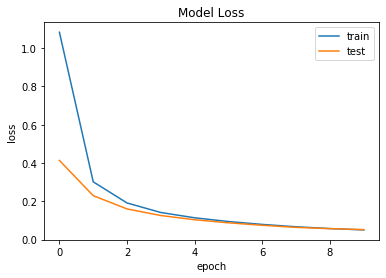

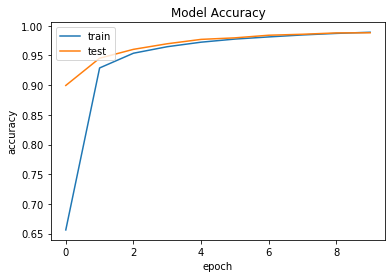

In [84]:
#RUNIT
# the model with 18 neurons in the hidden layer 
model_2H18N18N = NN_Model_2H(18,18,0.0003)
model_2H18N18N_history = model_2H18N18N.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=32,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_2H18N18N_history)
plot_acc(model_2H18N18N_history)

In [85]:
def NN_Model_3H(hidden_neurons_1,hidden_neurons_2, hidden_neurons_3, learning_rate):
    """Definition of deep learning model with one dense hidden layer"""
    model = Sequential([
        # More hidden layers can be added here
        Dense(hidden_neurons_1, activation='relu', input_shape=(19,),
              kernel_initializer='random_normal'), # Hidden Layer
        Dense(hidden_neurons_2, activation='relu',
              kernel_initializer='random_normal'), # Hidden Layer
        Dense(hidden_neurons_3, activation='relu',
              kernel_initializer='random_normal'), # Hidden Layer
        Dense(18, activation='softmax',
              kernel_initializer='random_normal')  # Output Layer
    ])
    adam_opt = Adam(lr=learning_rate, beta_1=0.9, beta_2=0.999, amsgrad=False)
    model.compile(optimizer=adam_opt,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [86]:
#RUNIT
# Reproducibility hacks!

np.random.seed(968172)
tf.random.set_seed(83018241)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
6827/6827 - 10s - loss: 1.1240 - accuracy: 0.6477 - val_loss: 0.5027 - val_accuracy: 0.8692
Epoch 2/10
6827/6827 - 9s - loss: 0.3834 - accuracy: 0.9127 - val_loss: 0.3083 - val_accuracy: 0.9344
Epoch 3/10
6827/6827 - 9s - loss: 0.2580 - accuracy: 0.9461 - val_loss: 0.2213 - val_accuracy: 0.9559
Epoch 4/10
6827/6827 - 9s - loss: 0.1900 - accuracy: 0.9584 - val_loss: 0.1637 - val_accuracy: 0.9624
Epoch 5/10
6827/6827 - 9s - loss: 0.1425 - accuracy: 0.9639 - val_loss: 0.1233 - val_accuracy: 0.9668
Epoch 6/10
6827/6827 - 9s - loss: 0.1106 - accuracy: 0.9724 - val_loss: 0.0990 - val_accuracy: 0.9750
Epoch 7/10
6827/6827 - 9s - loss: 0.0906 - accuracy: 0.9789 - val_loss: 0.0814 - val_accuracy: 0.9817
Epoch 8/10
6827/6827 - 9s - loss: 0.0775 - accuracy: 0.9823 - val_loss: 0.0737 - val_accuracy: 0.9838
Epoch 9/10
6827/6827 - 9s - loss: 0.0688 - accuracy: 0.9842 - val_loss: 0.0674 - val_accuracy: 0.9829
Epoch 10/10
6827/6827 - 9s - loss: 0.0622 - accuracy: 0.9857 - val_loss: 0.0594 -

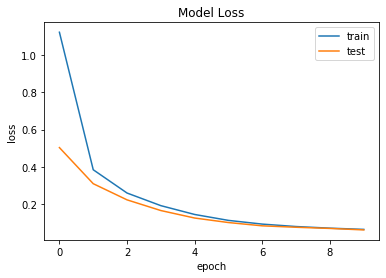

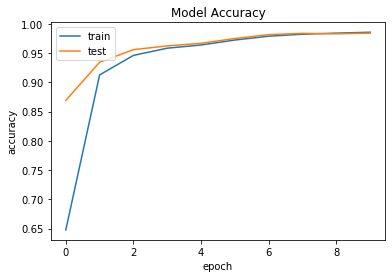

In [87]:
#RUNIT
# the model with 18 neurons in the hidden layer 
model_3H18N18N18N = NN_Model_3H(18,18,18,0.0003)
model_3H18N18N18N_history = model_3H18N18N18N.fit(train_features,
                                      train_L_onehot,
                                      epochs=10, batch_size=32,
                                      validation_data=(test_features, test_L_onehot),
                                      verbose=2)
plot_loss(model_3H18N18N18N_history)
plot_acc(model_3H18N18N18N_history)

#### Takeaways from Tuning Experiments #4

Answer the questions below to recap what we learn about the effects of the number of hidden layers.


**QUESTIONS**

1. How many neurons to use in each hidden layer?

**Some observations:**

* Compared to the more expensive network down below (3 hidden layers, @ 18 neurons each,0.9844), it seems like we can gain the similar accuracy with 1 hidden layer @ 18 neurons (~0.9811)

* We can gain the higher accuracy (~0.9882) with the network (2 hidden layers, @ 18 neurons each) than the network (3 hidden layers, @ 18 neurons each).

**What do we learn from here?**

1) Usually, the more neurons we train, the more accuracy we can get (subject to risk of overfitting, vanishing and exploding gradients, see below)  

2) While increasing the number of hidden layers in a neural network can potentially improve its ability to learn complex patterns and representations, it does not guarantee higher accuracy. 

**CHALLENGE QUESTION**

*(Optional, challenging)* Try to vary the number of neurons in the hidden layers (add / subtract as needed) and check the results.

## Additional Tuning Opportunities

There are other hyperparameters that can be adjusted:

  * Change the optimizer (try optimizers other than `Adam`)
  * Activation function  (this is actually a part of the network's architecture)

We encourage you to explore the effects of changing these in your network.

## Closing Remarks

This process of experimentation with different parameters for the neural network can get repetitive and cause this notebook to become very long.
Instead, it would be more beneficial to run experiments like this in a scripting environment.
To do this, we need to identify the relevant code elements for our script.
In a general sense, this is what we should pick out:

* Useful Python libraries & user-defined functions
* Proper sequence of commands that were run throughout this notebook (i.e. one-hot encoding must be done before training the models)
* Code cells that require repetition to run many tests (i.e. the cells right above this section)

In brief, once the initial experiments are done and we have established a working pipeline for machine learning, we need to change the way we work.
Real machine-learning work requires many repetitive experiments, each of which may take a long time to complete.
Instead of running many experiments in Jupyter notebooks, where each will require us to wait for a while to finish, we need to be able to carry out many experiments in parallel so that we can obtain our results in a timely manner.
This is key reason why we should make a script for these experiments and submit the script to run them in batch (non-interactive model).
HPC is well suited for this type of workflow--in fact it is most efficient when used in this way.
Here are the key components of the "batch" way of working:

* A job scheduler (such as SLURM job scheduler on HPC) to manage our jobs and run them on the appropriate resources;
* The machine learning script written in Python, which will read inputs from files and write outputs to files and/or standard output;
* The job script to launch the machine learning script in the non-interactive environment (e.g. HPC compute node);
* A way to systematically repeat the experiments with some variations. This can be done by adding some command-line arguments for the (hyper)parameters that will be varied for each test.

In your hands-on package, there is a folder called `expts-sherlock` which contains a sample Python script and SLURM job script that you can submit to the HPC cluster:

* `NN_Model-064n.py` shows an example of how a script converted from this notebook would look like.
  We recommend only one experiment per script to avoid complication.

* `NN_Model-064n.wahab.job` is the corresponding job script for ODU's Wahab cluster.

In [88]:
#RUNIT
!cat expts-sherlock/NN_Model-064n.py

#!/usr/bin/env python
"""
Complete Python script to do the ML pipeline of Sherlock 19F17C dataset
using two methods:

* Decision tree classifier
* Logistic regression

Use all remaining features.
"""

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import sklearn
from sklearn import preprocessing
import tensorflow as tf

from analysis_sherlock_ML import *

# Import KERAS objects
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

# CUSTOMIZATIONS
numpy.set_printoptions(linewidth=1000)


def model_evaluate(model,test_F,test_L):
    test_L_pred = model.predict(test_F)
    print("Evaluation by using model:",type(model).__name__)
    print("accuracy_score:",accuracy_score(test_L, test_L_pred))
    print("confusion_matrix:","\n",confusion_matrix(test_L, test_L_pred))
    return

# Notice the path:
df = pd.read_csv("../sherlock/sherlock_18apps.csv")
summarize_